<a href="https://colab.research.google.com/github/AndresEspin/TFG24/blob/main/TFG_AER_version_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto de análisis de datos mediante aprendizaje automático se desarrolla un sistema de análisis de datos basado en IA y su aplicación en el Análisis de Supervivencia aplicado a ala retención de clienets de un centro deportivo.

El repositorio de datos, el archivo README con su instalación y la memoria del proyecto estan en la url https://github.com/AndresEspin/TFG24/tree/main.

por A Espín Rearte


# Importación y de datos y librerias

En esta sección se establece la conexión con el directorio que contiene los archivos de datos, se importan los paquetes necesarios para el análisis y se leen los datasets.

In [1]:
!pip install -U scikit-learn==1.3.2
!pip install scikit-survival==0.22.1
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=069525cca99419d387c50419eb99c50536bcfcd5f86a669366a2aa3329da78df
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Importamos librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
%matplotlib inline

# importar todas las funciones de pylab
from pylab import *
# Ouliers y nulls
from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from statsmodels.imputation import mice
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)

import sksurv.ensemble
from sklearn.model_selection import train_test_split

from lifelines import CoxPHFitter
from lifelines.utils import concordance_index

from sklearn.covariance import MinCovDet

from sklearn.ensemble import IsolationForest

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sksurv.linear_model import CoxPHSurvivalAnalysis

from sksurv.svm import HingeLossSurvivalSVM

from sksurv.svm import MinlipSurvivalAnalysis
from sksurv.svm import FastKernelSurvivalSVM
from sksurv.functions import StepFunction

from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import datetime as dt

fecha_referencia = dt.datetime(2024, 1, 12)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [4]:
# Carga de los archivos Excel desde github
ALTES_I_BAIXES_ruta = 'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ALTES_I_BAIXES.xlsx'
CLIENTS_COMPLET_ruta = 'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/CLIENTS_COMPLET.xlsx'
CONSUM_ALTRES_ruta = 'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/CONSUM_ALTRES.xlsx'
data_darrer_rebuts_ruta = 'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/data_darrer_rebuts.xlsx'
pagos_ruta = 'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/pagos.xlsx'

# Lectura de los archivos Excel en dataframes de Pandas
data_altes_i_baixes = pd.read_excel(ALTES_I_BAIXES_ruta)
data_clientes = pd.read_excel(CLIENTS_COMPLET_ruta)
data_consum_altres = pd.read_excel(CONSUM_ALTRES_ruta)
data_darrer_rebut = pd.read_excel(data_darrer_rebuts_ruta)
data_formaspago = pd.read_excel(pagos_ruta)

In [5]:
# URL de las 2 partes de RESERVAS.xlsx
urls = [
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/RESERVAS/RESERVAS_p1.xlsx',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/RESERVAS/RESERVAS_p2.xlsx'
]

# Carga y une las 2 partes
data_partes = []
for url in urls:
    data_parte = pd.read_excel(url)
    data_partes.append(data_parte)

data_reservas = pd.concat(data_partes)

In [6]:
# URL de las 15 partes de EntradesClaretNet.csv
urls = [
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p1.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p2.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p3.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p4.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p5.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p6.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p7.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p8.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p9.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p10.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p11.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p12.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p13.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p14.csv',
    'https://raw.githubusercontent.com/AndresEspin/TFG24/main/DATA/ENTRADAS/EntradesClaretNet_p15.csv'
]

# Carga y une las 15 partes
data_partes = []
for url in urls:
    data_parte = pd.read_csv(url)
    data_partes.append(data_parte)

data_entradesclaret = pd.concat(data_partes)

# FASE 1 Preparación y EDA

## Caracteristicas de datasets

En esta sección se leen los datasets y vemos dimensiones y tipos de datos

In [7]:
# Se imprimen los diferntes datasets para ver como estan estructurados.
print(data_altes_i_baixes)
print(data_altes_i_baixes.dtypes)

       Tipus                Data      Abonat  Operador  ModalitatCodi  \
0      BAIXA 2014-03-18 00:00:00  1244567983     12669          12625   
1       ALTA 2010-06-20 00:00:00  1244568037     13625          12555   
2      BAIXA 2010-04-15 00:00:00  1244568146     13547          14561   
3      BAIXA 2013-06-19 00:00:00  1244568146     13547          14561   
4      BAIXA 2011-03-19 00:00:00  1244568318     13477          12409   
...      ...                 ...         ...       ...            ...   
31629   ALTA 2022-10-01 00:00:00  1646768252     19714          15013   
31630  BAIXA 2022-06-09 20:10:06  1786667901     13364          14917   
31631   ALTA 2022-08-01 00:00:00  1866470987     19897          14993   
31632  BAIXA 2022-05-02 19:22:19  1946567940     17446          14674   
31633  BAIXA 2022-08-01 19:24:05  2225468497     14431          14674   

               ModalitatNom ModalitatPagament  
0      k9AHBFS2diaxtjOkO2OM              DXRZ  
1      71T7W9completw5qSURM

In [8]:
print(data_clientes)
print(data_clientes.dtypes)

           Abonat  CentreOrigen   DataAlta  DataBaixa  BaixaDefinitiva  \
0      1244567983           138 2013-02-28 2014-03-31                1   
1      1244568003           138 2009-04-21 2009-08-27                1   
2      1244568037           138 2010-06-20        NaT                0   
3      1244568094           138 2013-03-12 2014-05-16                1   
4      1244568146           138 2007-04-12 2008-09-25                1   
...           ...           ...        ...        ...              ...   
47552  2225668208           146 2022-10-17 2023-03-01                1   
47553  2225668306           138 2013-08-31 2014-12-31                1   
47554  2225668355           138 2013-10-02 2016-01-02                1   
47555  2225668364           138 2011-11-09 2013-10-22                1   
47556  2225767898           146 2022-05-11 2023-02-01                1   

       Modalitat               DescMod ModalitatPagament  Sexe  EdatActual  \
0          12625  k9AHBFS2diaxtjO

In [9]:
print(data_consum_altres)
print(data_consum_altres.dtypes)

       NUM_CLIENTE
0       1244568130
1       1244568180
2       1244568450
3       1244568534
4       1244568724
...            ...
27454   1244770539
27455   1275371741
27456   1245269400
27457   1254875264
27458   1264868539

[27459 rows x 1 columns]
NUM_CLIENTE    int64
dtype: object


In [10]:
print(data_darrer_rebut)
print(data_darrer_rebut.dtypes)

           Abonat DataFacturacio  ImportDarrerRebut
0      1385369165     2014-07-21           -1223.49
1      1385170022     2019-07-20            -838.72
2      1385369102     2013-04-20            -805.12
3      1386469698     2020-05-30            -800.73
4      1244573857     2020-05-30            -799.50
...           ...            ...                ...
17474  1385967907     2015-03-28             776.72
17475  1254169000     2020-01-18             791.13
17476  1385968665     2021-01-03             797.88
17477  1385868657     2014-12-07             826.32
17478  1263970226     2021-11-03             945.01

[17479 rows x 3 columns]
Abonat                        int64
DataFacturacio       datetime64[ns]
ImportDarrerRebut           float64
dtype: object


In [11]:
print(data_entradesclaret)
print(data_entradesclaret.dtypes)

            Abonat                 DataHora  BaixaDefinitiva  \
0       1263469017  2018-03-06 07:30:23.980              0.0   
1       1275267947  2019-01-22 20:54:43.507              1.0   
2       1345269857  2010-06-01 12:22:02.000              1.0   
3       1385769003  2013-01-05 15:51:45.000              1.0   
4       1255770906  2015-05-11 17:11:54.310              1.0   
...            ...                      ...              ...   
243148  1254672411  2018-07-12 19:10:18.683              0.0   
243149  1386167957  2017-10-02 19:03:17.940              0.0   
243150  1385469167  2011-04-06 13:53:53.000              1.0   
243151  1385368038  2014-01-08 13:46:59.000              1.0   
243152  1385269627  2009-06-16 12:02:33.000              1.0   

                      Databaixa  codimodalitat             Modalitat  
0       9999-12-31 00:00:00.000        12567.0  TwedmGCbasicZm62ti4q  
1       2019-09-30 23:59:59.000        13562.0  RTuG7G13diaTVWjov00z  
2       2013-12-05

In [12]:
print(data_reservas)
print(data_reservas.dtypes)

        Client Alt ID Joined Date Client Status Sub Location  \
0          1386469090  2019-09-19      Inactive          NaN   
1          1386469090  2019-09-19      Inactive          NaN   
2          1245469970  2019-04-18        Active          NaN   
3          1245469970  2019-04-18        Active          NaN   
4          1284069411  2019-11-20        Active          NaN   
...               ...         ...           ...          ...   
185093     1386769789  2022-08-31        Active          NaN   
185094     1386569015  2020-12-11        Active          NaN   
185095     1386569015  2020-12-11        Active          NaN   
185096     1386770497  2021-07-22        Active          NaN   
185097     1386770393  2022-10-05        Active          NaN   

         Service Category         Service Title           Activity  \
0       PERSONAL TRAINING  tz90XhxPTRAINPQM6XFC  PERSONAL TRAINING   
1       PERSONAL TRAINING  tz90XhxPTRAINPQM6XFC  PERSONAL TRAINING   
2        PHYSIOTHERAP

In [13]:
print(data_formaspago)
print(data_formaspago.dtypes)

    ModalitatPagament  MesesModalidadPago  Descuento
0                CWOF                  12     16.670
1                NJHG                  10     10.000
2                EADZ                  12      8.300
3                SCIC                  12     50.000
4                FSVT                  12     40.000
5                CYXZ                  12      0.000
6                EWZE                  14     14.290
7                HAHY                  12     42.500
8                TCGQ                  12     15.000
9                WDWK                  12     31.000
10               AXZL                  12     25.000
11               EMGD                  12     21.000
12               DMPZ                  12     10.000
13               ZRQH                  12      0.000
14               KMFB                  12      0.000
15               YBAI                  12     24.940
16               CZYF                  12      6.000
17               DMIG                  14     

## Merges de datasets

###  data_clientes

In [14]:
data_clientes_net = data_clientes.copy()

# Convertir las columnas de data_clients_net a sus tipos y renombrar
data_clientes_net['Abonat'] = data_clientes_net['Abonat'].astype(pd.Int64Dtype())
data_clientes_net['CentreOrigen'] = data_clientes_net['CentreOrigen'].astype(pd.Int64Dtype())
data_clientes_net['Modalitat'] = data_clientes_net['Modalitat'].astype(str)
data_clientes_net = data_clientes_net.rename(columns={'Modalitat': 'ModalitatCodi'})
data_clientes_net['ModalitatCodi'] = data_clientes_net['ModalitatCodi'].str.strip()
data_clientes_net['DescMod'] = data_clientes_net['DescMod'].astype(str)
data_clientes_net = data_clientes_net.rename(columns={'DescMod': 'ModalitatNom'})
data_clientes_net['ModalitatNom'] = data_clientes_net['ModalitatNom'].str.strip()
data_clientes_net['ModalitatPagament'] = data_clientes_net['ModalitatPagament'].astype(str)
data_clientes_net['ModalitatPagament'] = data_clientes_net['ModalitatPagament'].str.strip()
data_clientes_net['Sexe'] = data_clientes_net['Sexe'].astype('category')
data_clientes_net['EdatActual'] = pd.to_numeric(data_clientes_net['EdatActual'], errors='coerce').astype('float')
data_clientes_net['CodiPostal'] = data_clientes_net['CodiPostal'].astype('category')
data_clientes_net['Nacionalitat'] = data_clientes_net['Nacionalitat'].astype('category')

In [15]:
data_entradesclaret_net = data_entradesclaret.copy()

# Convertir las columnas de data_entradesclaret_net a sus tipos solo las filas válidas y renombrar
data_entradesclaret_net['Abonat'] = pd.to_numeric(data_entradesclaret_net['Abonat'], errors='coerce', downcast='integer')
data_entradesclaret_net['Abonat'] = data_entradesclaret_net['Abonat'].astype(pd.Int64Dtype())
data_entradesclaret_net['DataHora'] = pd.to_datetime(data_entradesclaret_net['DataHora'])
data_entradesclaret_net['BaixaDefinitiva'] = data_entradesclaret_net['BaixaDefinitiva'].astype('category')
data_entradesclaret_net['Databaixa'] = pd.to_datetime(data_entradesclaret_net['Databaixa'], errors='coerce').dt.date
data_entradesclaret_net['Databaixa'] = pd.to_datetime(data_entradesclaret_net['Databaixa'])
data_entradesclaret_net = data_entradesclaret_net.rename(columns={'Databaixa': 'DataBaixa'})
data_entradesclaret_net['codimodalitat'] = data_entradesclaret_net['codimodalitat'].astype(str)
data_entradesclaret_net = data_entradesclaret_net.rename(columns={'codimodalitat': 'ModalitatCodi'})
data_entradesclaret_net['Modalitat'] = data_entradesclaret_net['Modalitat'].astype(str)
data_entradesclaret_net = data_entradesclaret_net.rename(columns={'Modalitat': 'ModalitatNom'})

In [16]:
# data_censura la fecha máxima de 'DataHora' en data_entradesclaret_net +1
data_censura = data_entradesclaret_net['DataHora'].max()
data_censura = data_censura + timedelta(days=1)
data_censura = data_censura.replace(hour=0, minute=0, second=0, microsecond=0)
print(data_censura)

2022-11-23 00:00:00


In [17]:
#Se eliminan registros erroneos con fecha sde alta y baja inconsistente
data_clientes_net = data_clientes_net.loc[data_clientes_net['DataBaixa'] >= data_clientes_net['DataAlta']]

#Se divide el dataset y se selecciona aquellos existenetes anteriores a la fecha de censura
data_clientes_censura = data_clientes_net[data_clientes_net['DataAlta'] < data_censura].copy()
data_clientes_futuro = data_clientes_net[data_clientes_net['DataBaixa'] >= data_censura].copy()
data_clientes_censura.loc[data_clientes_censura['DataBaixa'] >= data_censura, 'BaixaDefinitiva'] = 0
data_clientes_censura.loc[data_clientes_censura['DataBaixa'] >= data_censura, 'DataBaixa'] = pd.NaT


In [18]:
print(data_clientes_censura.shape)
print(data_clientes_censura.dtypes)

(41844, 12)
Abonat                        Int64
CentreOrigen                  Int64
DataAlta             datetime64[ns]
DataBaixa            datetime64[ns]
BaixaDefinitiva               int64
ModalitatCodi                object
ModalitatNom                 object
ModalitatPagament            object
Sexe                       category
EdatActual                  float64
CodiPostal                 category
Nacionalitat               category
dtype: object


### data_entrades

In [19]:
columnas_a_eliminar = ['DataBaixa','BaixaDefinitiva','ModalitatCodi','ModalitatNom']
data_entradesclaret_net = data_entradesclaret_net.drop(columns=columnas_a_eliminar)

data_entradesclaret_net=data_entradesclaret_net.merge(data_clientes_censura[['Abonat','DataAlta','DataBaixa']], on='Abonat', how='left')

data_entradesclaret_net = data_entradesclaret_net.query("(DataHora >= DataAlta) & ((DataBaixa.isnull()) | (DataHora <= DataBaixa))")


In [20]:
# primer y último acceso por cada abonado
data_entradesclaret_net['primer_acces'] = data_entradesclaret_net.groupby(['Abonat', 'DataAlta'])['DataHora'].transform('min')
data_entradesclaret_net['ultim_acces'] = data_entradesclaret_net.groupby(['Abonat', 'DataAlta'])['DataHora'].transform('max')

# número total de registros de acceso por cada abonado
data_entradesclaret_net['numero_accesos'] = data_entradesclaret_net.groupby(['Abonat', 'DataAlta'])['Abonat'].transform('count')

# día de la semana
data_entradesclaret_net['dia_semana'] = data_entradesclaret_net['DataHora'].dt.day_name()
data_entradesclaret_net['dia_semana'] = data_entradesclaret_net['dia_semana'].astype('category')

# día de la semana más frecuente
data_entradesclaret_net['dia_habitual'] = data_entradesclaret_net.groupby(['Abonat', 'DataAlta'])['dia_semana'].transform(lambda x: x.mode().iloc[0])
data_entradesclaret_net['dia_habitual'] = data_entradesclaret_net['dia_habitual'].astype('category')

# franja horaria
data_entradesclaret_net['franja_horaria'] = pd.cut(data_entradesclaret_net['DataHora'].dt.hour, bins=[0, 9, 13, 15.5, 17, 20.5, 24],
                                               labels=['primera_hora', 'mati', 'migdia', 'mitjatarda', 'tarda', 'nit']).astype('category')

data_entradesclaret_net['franja_habitual'] = data_entradesclaret_net.groupby(['Abonat', 'DataAlta'])['franja_horaria'].transform(lambda x: x.mode().iloc[0])
data_entradesclaret_net['franja_habitual'] = data_entradesclaret_net['franja_habitual'].astype('category')

# entradas en intervalos recientes
intervalos = [30, 90, 180]
for intervalo in intervalos:
  data_entradesclaret_net.loc[data_entradesclaret_net['DataBaixa'].notnull(), 'fecha_limite'] = data_entradesclaret_net['DataBaixa'] - pd.Timedelta(days=intervalo)
  data_entradesclaret_net.loc[data_entradesclaret_net['DataBaixa'].isnull(), 'fecha_limite'] = data_censura - pd.Timedelta(days=intervalo)
  data_entradesclaret_net.loc[(data_entradesclaret_net['DataHora'] > data_entradesclaret_net['fecha_limite']),'entrada_reciente'] = 1
  data_entradesclaret_net[f'entrades_darrers_{intervalo}'] = data_entradesclaret_net.groupby(['Abonat', 'DataAlta'])['entrada_reciente'].transform('sum')
  data_entradesclaret_net.drop(['fecha_limite', 'entrada_reciente'], axis=1, inplace=True)

In [21]:
# un unico registro por abonado
clientes_de_entradas = data_entradesclaret_net.drop(columns=['DataHora','dia_semana','franja_horaria'])
clientes_de_entradas = clientes_de_entradas.drop_duplicates(subset=('Abonat','DataAlta'), keep='first')

data1 = data_clientes_censura.merge(clientes_de_entradas, on=['Abonat', 'DataAlta','DataBaixa'], how='left')

In [22]:
valores_nulos_por_columna = data1.isnull().sum()
print(valores_nulos_por_columna)
cantidad_abonat_unicos = data1['Abonat'].nunique()
print(cantidad_abonat_unicos)
print(data1.dtypes)
print(data1.shape)

Abonat                     0
CentreOrigen               0
DataAlta                   0
DataBaixa               2389
BaixaDefinitiva            0
ModalitatCodi              0
ModalitatNom               0
ModalitatPagament          0
Sexe                       0
EdatActual                 0
CodiPostal                 0
Nacionalitat               0
primer_acces            8370
ultim_acces             8370
numero_accesos          8370
dia_habitual            8370
franja_habitual         8370
entrades_darrers_30     8370
entrades_darrers_90     8370
entrades_darrers_180    8370
dtype: int64
35509
Abonat                           Int64
CentreOrigen                     Int64
DataAlta                datetime64[ns]
DataBaixa               datetime64[ns]
BaixaDefinitiva                  int64
ModalitatCodi                   object
ModalitatNom                    object
ModalitatPagament               object
Sexe                          category
EdatActual                     float64
CodiPostal 

### data_altes_i_baixes

In [23]:
data_altes_i_baixes_net = data_altes_i_baixes.copy()

# Convertir las columnas de data_altes_i_baixes_net a sus tipos y renombrar
data_altes_i_baixes_net['Tipus'] = data_altes_i_baixes_net['Tipus'].astype('category')
data_altes_i_baixes_net = data_altes_i_baixes_net.rename(columns={'Data': 'Data_registre'})
data_altes_i_baixes_net['Abonat'] = data_altes_i_baixes_net['Abonat'].astype(pd.Int64Dtype())
data_altes_i_baixes_net['Operador'] = data_altes_i_baixes_net['Operador'].astype('category')
data_altes_i_baixes_net['ModalitatCodi'] = data_altes_i_baixes_net['ModalitatCodi'].astype(str)
data_altes_i_baixes_net['ModalitatNom'] = data_altes_i_baixes_net['ModalitatNom'].astype(str)
data_altes_i_baixes_net['ModalitatPagament'] = data_altes_i_baixes_net['ModalitatPagament'].astype(str)

In [24]:
data_altes_i_baixes_net = data_altes_i_baixes_net.merge(data_clientes_censura[['Abonat','DataAlta','DataBaixa']], on='Abonat', how='left')
data_altes_i_baixes_net = data_altes_i_baixes_net.query("Tipus == 'BAIXA' and Data_registre > DataAlta and (Data_registre < DataBaixa or DataBaixa.isnull())")
data_altes_i_baixes_net = data_altes_i_baixes_net.sort_values(by='Data_registre', ascending=False)
data_altes_i_baixes_net = data_altes_i_baixes_net.drop_duplicates(subset=['Abonat', 'DataAlta'], keep='first')


In [25]:
data2=data1.merge(data_altes_i_baixes_net[['Abonat','DataAlta','Data_registre']], on=['Abonat', 'DataAlta'], how='left')

In [26]:
valores_nulos_por_columna = data2.isnull().sum()
print(valores_nulos_por_columna)
cantidad_abonat_unicos = data2['Abonat'].nunique()
print(cantidad_abonat_unicos)
print(data2.dtypes)
print(data2.shape)

Abonat                      0
CentreOrigen                0
DataAlta                    0
DataBaixa                2389
BaixaDefinitiva             0
ModalitatCodi               0
ModalitatNom                0
ModalitatPagament           0
Sexe                        0
EdatActual                  0
CodiPostal                  0
Nacionalitat                0
primer_acces             8370
ultim_acces              8370
numero_accesos           8370
dia_habitual             8370
franja_habitual          8370
entrades_darrers_30      8370
entrades_darrers_90      8370
entrades_darrers_180     8370
Data_registre           17440
dtype: int64
35509
Abonat                           Int64
CentreOrigen                     Int64
DataAlta                datetime64[ns]
DataBaixa               datetime64[ns]
BaixaDefinitiva                  int64
ModalitatCodi                   object
ModalitatNom                    object
ModalitatPagament               object
Sexe                          category


### data_consum_altres

In [28]:
data_consum_altres_net = data_consum_altres.copy()

# Convertir las columnas de data_consum_altres_net a sus tipos y renombrar
data_consum_altres_net['NUM_CLIENTE'] = pd.to_numeric(data_consum_altres_net['NUM_CLIENTE'], errors='coerce', downcast='integer')
data_consum_altres_net['NUM_CLIENTE'] = data_consum_altres_net['NUM_CLIENTE'].astype(pd.Int64Dtype())
data_consum_altres_net = data_consum_altres_net.rename(columns={'NUM_CLIENTE': 'Abonat'})


In [29]:
# Se crea nueva columna booleana ServiciosExtra
data_consum_altres_net.loc[data_consum_altres_net['Abonat'].notnull(), 'ServiciosExtra'] = 1
data_consum_altres_net['ServiciosExtra'] = data_consum_altres_net['ServiciosExtra'].astype('category')

# Fusionar los DataFrames en base a la columna 'Abonat'
data3 = pd.merge(data2, data_consum_altres_net, on='Abonat', how='left')

# Llenar la nueva columna 'ServiciosExtra'
data3['ServiciosExtra'] = data3['ServiciosExtra'].cat.add_categories(0)
data3.loc[data3['ServiciosExtra'].isnull(), 'ServiciosExtra'] = 0

In [30]:
valores_nulos_por_columna = data3.isnull().sum()
print(valores_nulos_por_columna)
cantidad_abonat_unicos = data3['Abonat'].nunique()
print(cantidad_abonat_unicos)
print(data3.shape)

Abonat                      0
CentreOrigen                0
DataAlta                    0
DataBaixa                2389
BaixaDefinitiva             0
ModalitatCodi               0
ModalitatNom                0
ModalitatPagament           0
Sexe                        0
EdatActual                  0
CodiPostal                  0
Nacionalitat                0
primer_acces             8370
ultim_acces              8370
numero_accesos           8370
dia_habitual             8370
franja_habitual          8370
entrades_darrers_30      8370
entrades_darrers_90      8370
entrades_darrers_180     8370
Data_registre           17440
ServiciosExtra              0
dtype: int64
35509
(41844, 22)


### data_darrer_rebut

In [31]:
data_darrer_rebut_net = data_darrer_rebut.copy()

# Convertir las columnas de data_darrer_rebut_net a sus tipos y renombrar
data_darrer_rebut_net['Abonat'] = data_darrer_rebut_net['Abonat'].astype(pd.Int64Dtype())
data_darrer_rebut_net['ImportDarrerRebut'] = pd.to_numeric(data_darrer_rebut_net['ImportDarrerRebut'], errors='coerce').astype('float')


In [32]:
# Coorrecio de ImportTotal por Abonat
data_darrer_rebut_net['ImportAbsolut'] = data_darrer_rebut_net['ImportDarrerRebut'].abs()


In [33]:
print(data_darrer_rebut_net.dtypes)

Abonat                        Int64
DataFacturacio       datetime64[ns]
ImportDarrerRebut           float64
ImportAbsolut               float64
dtype: object


In [34]:
# Merge resultat5 con darrer rebut
data4 = data3.merge(data_darrer_rebut_net [['Abonat','DataFacturacio','ImportAbsolut']] , on='Abonat', how='left')
data4.loc[(data4['DataFacturacio'] > data4['DataBaixa']) | (data4['DataFacturacio'] < data4['DataAlta']), 'ImportAbsolut'] = np.nan
data4.loc[(data4['DataFacturacio'] > data4['DataBaixa']) | (data4['DataFacturacio'] < data4['DataAlta']), 'DataFacturacio'] = pd.NaT



In [35]:
print(data4.dtypes)

Abonat                           Int64
CentreOrigen                     Int64
DataAlta                datetime64[ns]
DataBaixa               datetime64[ns]
BaixaDefinitiva                  int64
ModalitatCodi                   object
ModalitatNom                    object
ModalitatPagament               object
Sexe                          category
EdatActual                     float64
CodiPostal                    category
Nacionalitat                  category
primer_acces            datetime64[ns]
ultim_acces             datetime64[ns]
numero_accesos                 float64
dia_habitual                  category
franja_habitual               category
entrades_darrers_30            float64
entrades_darrers_90            float64
entrades_darrers_180           float64
Data_registre           datetime64[ns]
ServiciosExtra                category
DataFacturacio          datetime64[ns]
ImportAbsolut                  float64
dtype: object


In [36]:
valores_nulos_por_columna = data4.isnull().sum()
print(valores_nulos_por_columna)
cantidad_abonat_unicos = data4['Abonat'].nunique()
print(cantidad_abonat_unicos)
print(data4.shape)

Abonat                      0
CentreOrigen                0
DataAlta                    0
DataBaixa                2389
BaixaDefinitiva             0
ModalitatCodi               0
ModalitatNom                0
ModalitatPagament           0
Sexe                        0
EdatActual                  0
CodiPostal                  0
Nacionalitat                0
primer_acces             8370
ultim_acces              8370
numero_accesos           8370
dia_habitual             8370
franja_habitual          8370
entrades_darrers_30      8370
entrades_darrers_90      8370
entrades_darrers_180     8370
Data_registre           17440
ServiciosExtra              0
DataFacturacio          25868
ImportAbsolut           25868
dtype: int64
35509
(41844, 24)


### data_Reservas

In [37]:
data_reservas_net = data_reservas.copy()

# Convertir las columnas de data_reservas_net a sus tipos y renombrar
data_reservas_net['Client Alt ID'] = pd.to_numeric(data_reservas_net['Client Alt ID'], errors='coerce', downcast='integer')
data_reservas_net['Client Alt ID'] = data_reservas_net['Client Alt ID'].astype(pd.Int64Dtype())
data_reservas_net = data_reservas_net.rename(columns={'Client Alt ID': 'Abonat'})
data_reservas_net['Client Status'] = data_reservas_net['Client Status'].astype('category')
data_reservas_net['Sub Location'] = data_reservas_net['Sub Location'].astype('category')
data_reservas_net['Service Category'] = data_reservas_net['Service Category'].astype('category')
data_reservas_net['Service Title'] = data_reservas_net['Service Title'].astype('category')
data_reservas_net['Activity'] = data_reservas_net['Activity'].astype('category')
data_reservas_net['Trainer Alt ID'] = data_reservas_net['Trainer Alt ID'].astype('category')
data_reservas_net['Time of Session'] = pd.to_datetime(data_reservas_net['Time of Session'], format='%H:%M:%S')
data_reservas_net['Attendance'] = data_reservas_net['Attendance'].astype('category')
data_reservas_net['Billed'] = data_reservas_net['Billed'].astype('category')
data_reservas_net['Booked at'] = pd.to_datetime(data_reservas_net['Booked at'], format='%H:%M:%S')
data_reservas_net['Device'] = data_reservas_net['Device'].astype('category')
data_reservas_net['Device.1'] = data_reservas_net['Device.1'].astype('category')
data_reservas_net['Ref ID'] = data_reservas_net['Ref ID'].astype(str)
data_reservas_net['Client ID'] = data_reservas_net['Client ID'].astype(str)
data_reservas_net['CSP ID'] = data_reservas_net['CSP ID'].astype(str)
data_reservas_net['CSP Package AltID'] = data_reservas_net['CSP Package AltID'].astype(str)
data_reservas_net['CSP cost'] = pd.to_numeric(data_reservas_net['CSP cost'], errors='coerce').astype('float')

In [38]:
fecha_inicio_reservas = data_reservas_net['Booked on'].min()
print(fecha_inicio_reservas)

2019-12-10 00:00:00


In [39]:
print(data_reservas_net.shape)

(370196, 21)


In [40]:
data_reservas_net['Date of Session'] = pd.to_datetime(data_reservas_net['Date of Session'])
data_reservas_net['Time of Session'] = pd.to_datetime(data_reservas_net['Time of Session']).dt.time
data_reservas_net['Booked on'] = pd.to_datetime(data_reservas_net['Booked on'])
data_reservas_net['Booked at'] = pd.to_datetime(data_reservas_net['Booked at']).dt.time

# Crear la nueva columna 'FechaHora' combinando 'Date of Session' y 'Time of Session'
data_reservas_net['fecha_sesion'] = pd.to_datetime(data_reservas_net['Date of Session'].astype(str) + ' ' + data_reservas_net['Time of Session'].astype(str))
data_reservas_net['fecha_reserva'] = pd.to_datetime(data_reservas_net['Booked on'].astype(str) + ' ' + data_reservas_net['Booked at'].astype(str))


In [41]:
columnas_a_eliminar = ['Joined Date','Client Status','Sub Location','Activity','Device.1','CSP Package AltID','CSP cost','CSP ID','Client ID','Ref ID','Device','Booked at','Booked on','Billed','Date of Session','Time of Session','Trainer Alt ID']
data_reservas_net = data_reservas_net.drop(columns=columnas_a_eliminar)

data_reservas_net=data_reservas_net.merge(data_clientes_censura[['Abonat','DataAlta','DataBaixa']], on='Abonat', how='left')
data_reservas_net = data_reservas_net.query("(fecha_sesion >= DataAlta) & ((DataBaixa.isnull()) | (fecha_sesion <= DataBaixa))")



In [42]:
print(data_reservas_net.shape)

(166403, 8)


In [43]:
# Categorizacion de las actividades según palabras clave
import re

def categorizar_actividad(actividad):
    if re.search(r'VIRTUAL|VIDEO|LIVE|STREAM', actividad, flags=re.IGNORECASE):
        return 'VIRTUAL_CLASS'
    elif re.search(r'AQUA', actividad, flags=re.IGNORECASE):
        return 'AQUATIC_CLASS'
    elif re.search(r'SPIN|BIKE', actividad, flags=re.IGNORECASE):
        return 'CICLO_CLASS'
    elif re.search(r'ZUMBA|MOVE|SEVILL|COUNTR|STEP|AEROBI', actividad, flags=re.IGNORECASE):
        return 'DANCE_CLASS'
    elif re.search(r'CUL|TONI|PUMP|CORE|HIIT|CROSS|UPPER|LOWER|FULL', actividad, flags=re.IGNORECASE):
        return 'TONING_CLASS'
    elif re.search(r'COMBAT|TOTAL|APRIMA|BOXI|JAMBOX|BOXA', actividad, flags=re.IGNORECASE):
        return 'CARDIO_CLASS'
    elif re.search(r'PILAT|STRETC|MOBILIT|MIND|IOGA', actividad, flags=re.IGNORECASE):
        return 'STRETCHING_CLASS'
    elif re.search(r'PT|PERSONAL|GT|GROUP|PHYSIO|F0|F1', actividad, flags=re.IGNORECASE):
        return 'PERSONAL_SERVICES'
    elif re.search(r'FITNESS', actividad, flags=re.IGNORECASE):
        return 'FITNESS_TRAINING'
    elif re.search(r'SWIM', actividad, flags=re.IGNORECASE):
        return 'SWIMMING_TRAINING'
    else:
        return 'OTHER_SERVICES'

# Se categorizan todas las modalidades con la funcion para evitar la diversidad de nomenclatura. Se crea una nueva columna 'Categoria'
data_reservas_net['Activitat'] = data_reservas_net['Service Title'].apply(categorizar_actividad)

data_reservas_net['Activitat'] = data_reservas_net['Activitat'].astype('category')


In [44]:
data_reservas_net['numero_reservas'] = data_reservas_net.groupby(['Abonat', 'DataAlta']).transform('size')
data_reservas_net['Antelacion'] = ((data_reservas_net['fecha_sesion'] - data_reservas_net['fecha_reserva']).dt.total_seconds() )/ (24 * 3600)
data_reservas_net['antelacion_promedio'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['Antelacion'].transform('mean')

# Crear nuevas columnas 'Attended', 'Cancelled' y 'Not Attended'
data_reservas_net['Attendance'] = data_reservas_net['Attendance'].replace({
    'Cancelled and Refunded': 'Cancelled',
    'Late Cancelled': 'Cancelled',
    'Scheduled': 'Not Attended'
})
data_reservas_net['Attended'] = (data_reservas_net['Attendance'] == 'Attended').astype(int)
data_reservas_net['Cancelled'] = (data_reservas_net['Attendance'] == 'Cancelled').astype(int)
data_reservas_net['NotAttended'] = (data_reservas_net['Attendance'] == 'Not Attended').astype(int)
data_reservas_net['Attended'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['Attended'].transform(lambda x: x.sum() / len(x))
data_reservas_net['Cancelled'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['Cancelled'].transform(lambda x: x.sum() / len(x))
data_reservas_net['NotAttended'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['NotAttended'].transform(lambda x: x.sum() / len(x))



data_reservas_net['Service Category'] = data_reservas_net['Service Category'].replace({
    'FITNESS STAFF': 'FITNESS ROOM booking',
    'GROUP TRAINING': 'PERSONAL TRAINING',
    'PHYSIOTHERAPY PT': 'PERSONAL TRAINING'
})
# Crear nuevas columnas 'Attended', 'Cancelled' y 'Not Attended'
data_reservas_net['Fitness'] = (data_reservas_net['Service Category'] == 'FITNESS ROOM booking').astype(int)
data_reservas_net['PersTraining'] = (data_reservas_net['Service Category'] == 'PERSONAL TRAINING').astype(int)
data_reservas_net['GroupExercise'] = (data_reservas_net['Service Category'] == 'GROUP EXERCISE').astype(int)
data_reservas_net['Nutrition'] = (data_reservas_net['Service Category'] == 'NUTRITION').astype(int)
data_reservas_net['Fitness'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['Fitness'].transform(lambda x: x.sum() / len(x))
data_reservas_net['PersTraining'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['PersTraining'].transform(lambda x: x.sum() / len(x))
data_reservas_net['GroupExercise'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['GroupExercise'].transform(lambda x: x.sum() / len(x))
data_reservas_net['Nutrition'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['Nutrition'].transform(lambda x: x.sum() / len(x))


# Calcular la actividad más frecuente por grupo
data_reservas_net['act_preferida'] = data_reservas_net.groupby(['Abonat', 'DataAlta'])['Activitat'].transform(lambda x: x.mode().iloc[0]).astype('category')

columnas_a_eliminar = ['Attendance','Service Category','Activitat','Service Title','fecha_sesion','fecha_reserva','DataBaixa','Antelacion']
data_reservas_net = data_reservas_net.drop(columns=columnas_a_eliminar)
data_reservas_net = data_reservas_net.drop_duplicates(subset=['Abonat', 'DataAlta'])

In [45]:
data5 = pd.merge(data4, data_reservas_net , on=['Abonat', 'DataAlta'], how='left')

In [46]:
valores_nulos_por_columna = data5.isnull().sum()
print(valores_nulos_por_columna)
cantidad_abonat_unicos = data5['Abonat'].nunique()
print(cantidad_abonat_unicos)
print(data5.shape)

Abonat                      0
CentreOrigen                0
DataAlta                    0
DataBaixa                2389
BaixaDefinitiva             0
ModalitatCodi               0
ModalitatNom                0
ModalitatPagament           0
Sexe                        0
EdatActual                  0
CodiPostal                  0
Nacionalitat                0
primer_acces             8370
ultim_acces              8370
numero_accesos           8370
dia_habitual             8370
franja_habitual          8370
entrades_darrers_30      8370
entrades_darrers_90      8370
entrades_darrers_180     8370
Data_registre           17440
ServiciosExtra              0
DataFacturacio          25868
ImportAbsolut           25868
numero_reservas         37692
antelacion_promedio     37692
Attended                37692
Cancelled               37692
NotAttended             37692
Fitness                 37692
PersTraining            37692
GroupExercise           37692
Nutrition               37692
act_prefer

## Dataset final

In [47]:
dataset_final = data5.copy()

### Ingenieria de variables

In [48]:
data_final=dataset_final.copy()

In [49]:
# Se crea un dataframe con la informacion de las modalidades, categorizandolas con la funcion para evitar la diversidad de nomenclatura.
# Se crea una nueva columna 'Categoria'

data_modalitats = data_clientes_net[['ModalitatCodi', 'ModalitatNom']].drop_duplicates()

import re

def categorizar_modalidad(modalidad):
    if re.search(r'prestige|excel|dir4you|fundador|exclusive|vip|expan', modalidad, flags=re.IGNORECASE):
        return 'partnerVIP'
    elif re.search(r'corporate|empresa|cossos|funcionaris|esade|barcelona|grans|banc|audiovisuals|PAFES|Sanitas|caix|empres|fun', modalidad, flags=re.IGNORECASE):
        return 'corporate'
    elif re.search(r'tarde|tarda|afternoon|nit|noche|af|tard|pre', modalidad, flags=re.IGNORECASE):
        return 'afternoon'
    elif re.search(r'mat|mañana|early|morning|primera|1ª|1a', modalidad, flags=re.IGNORECASE):
        return 'morning'
    elif re.search(r'mig|migdia|mitja|medio|mid', modalidad, flags=re.IGNORECASE):
        return 'midday'
    elif re.search(r'weekend|wk|cap|wkn|wknd|week', modalidad, flags=re.IGNORECASE):
        return 'weekend'
    elif re.search(r'tots|todos|all|especial|fit|grup', modalidad, flags=re.IGNORECASE):
        return 'multiclub'
    else:
        return 'general'

data_modalitats['ModalitatCodi'] = data_modalitats['ModalitatCodi'].astype(str)
data_modalitats['CategoriaModalitat'] = data_modalitats['ModalitatNom'].apply(categorizar_modalidad)
data_modalitats['CategoriaModalitat'] = data_modalitats['CategoriaModalitat'].astype('category')

data_final = data_final.merge(data_modalitats[['ModalitatCodi','CategoriaModalitat']], on='ModalitatCodi', how = 'left')

In [50]:
print(dataset_final.dtypes)

Abonat                           Int64
CentreOrigen                     Int64
DataAlta                datetime64[ns]
DataBaixa               datetime64[ns]
BaixaDefinitiva                  int64
ModalitatCodi                   object
ModalitatNom                    object
ModalitatPagament               object
Sexe                          category
EdatActual                     float64
CodiPostal                    category
Nacionalitat                  category
primer_acces            datetime64[ns]
ultim_acces             datetime64[ns]
numero_accesos                 float64
dia_habitual                  category
franja_habitual               category
entrades_darrers_30            float64
entrades_darrers_90            float64
entrades_darrers_180           float64
Data_registre           datetime64[ns]
ServiciosExtra                category
DataFacturacio          datetime64[ns]
ImportAbsolut                  float64
numero_reservas                float64
antelacion_promedio      

In [51]:
print(data_censura)

2022-11-23 00:00:00


In [52]:
# Se añade las variables MesesModalidadPAgo y Descuento al dataframe final con un merge con data_formaspago
data_final = data_final.merge(data_formaspago, on='ModalitatPagament', how='left')

data_final['DiasModalitatPago'] = data_final['MesesModalidadPago']*30


In [53]:
# Se añade la variable mes de alta y se categoriza ya que sabemos que tiene un componente ciclico importante
data_final['Mes_de_Alta'] = data_final['DataAlta'].dt.month
data_final.loc[:, 'Mes_de_Alta'] = data_final['Mes_de_Alta'].astype('category')


In [54]:
# Se sustituyen la svariables de fecha spor ratios o peridos y se llena nulos

data_final.loc[(data_final['BaixaDefinitiva'] == 0), 'dias_totales'] = (data_censura - data_final['DataAlta'] + timedelta(days=1)).dt.days
data_final.loc[(data_final['BaixaDefinitiva'] == 1), 'dias_totales'] = (data_final['DataBaixa'] - data_final['DataAlta'] + timedelta(days=1)).dt.days

data_final['period_primer_acces'] = (data_final['primer_acces'] - data_final['DataAlta'] + timedelta(days=1)).dt.days
data_final['period_primer_acces'].fillna(data_final['dias_totales'], inplace=True)

data_final['period_solic_baixa'] = (data_final['Data_registre'] - data_final['DataAlta'] + timedelta(days=1)).dt.days
data_final['period_solic_baixa'].fillna(data_final['dias_totales'], inplace=True)

data_final['DataFacturacio'].fillna(data_final['DataAlta'], inplace=True)
data_final.loc[(data_final['BaixaDefinitiva'] == 0), 'period_desde_fact'] = (data_censura - data_final['DataFacturacio'] + timedelta(days=1)).dt.days
data_final.loc[(data_final['BaixaDefinitiva'] == 1), 'period_desde_fact'] = (data_final['DataBaixa'] - data_final['DataFacturacio'] + timedelta(days=1)).dt.days
data_final['percent_consumit'] = data_final['period_desde_fact']/data_final['DiasModalitatPago']

data_final['dias_sin_venir'] = data_final['dias_totales']
data_final.loc[(data_final['BaixaDefinitiva'] == 0)&(data_final['ultim_acces'].notnull()), 'dias_sin_venir'] = (data_censura - data_final['ultim_acces']).dt.days
data_final.loc[(data_final['BaixaDefinitiva'] == 1)&(data_final['ultim_acces'].notnull()), 'dias_sin_venir'] = (data_final['DataBaixa'] - data_final['ultim_acces']).dt.days

data_final['ratio_inactivo'] = (data_final['dias_sin_venir'] / data_final['dias_totales'])

data_final['ratio_primer_us']= data_final['period_primer_acces']/data_final['dias_totales']

In [55]:
# Añadir la columna 'num_inscripcions' y 'edada en el momento del alta
data_final['num_inscripcions'] = data_final.groupby(['Abonat'])['DataAlta'].transform(lambda x: (x <= x.max()).sum())

data_final['Edat_Alta'] = data_final.apply(lambda row: row['EdatActual'] - (fecha_referencia - row['DataAlta']).days // 365,axis=1)

In [56]:
# Identificar columnas con valores NaN o NaT
columnas_con_nan_o_nat = data_final.columns[
    data_final.isna().any() | data_final.isin([np.nan, np.datetime64('NaT')]).any()
].tolist()

# Mostrar las columnas con valores NaN o NaT
print("Columnas con valores NaN o NaT:")
print(columnas_con_nan_o_nat)

Columnas con valores NaN o NaT:
['DataBaixa', 'primer_acces', 'ultim_acces', 'numero_accesos', 'dia_habitual', 'franja_habitual', 'entrades_darrers_30', 'entrades_darrers_90', 'entrades_darrers_180', 'Data_registre', 'ImportAbsolut', 'numero_reservas', 'antelacion_promedio', 'Attended', 'Cancelled', 'NotAttended', 'Fitness', 'PersTraining', 'GroupExercise', 'Nutrition', 'act_preferida']


In [57]:
valores_distintos = data_final['num_inscripcions'].unique()

# Mostrar la lista de valores distintos
print("Valores distintos de 'num_inscripcions':")
print(valores_distintos)

Valores distintos de 'num_inscripcions':
[ 1  4  3  2 16  5  8  7  6 10 12 14 19 11  9 15]


In [58]:
print (data_final['num_inscripcions'].dtypes)

int64


In [59]:
#Se categoriza la variable CodiPostal creando la columna Distancia
valores_unicos_codigos_postales = dataset_final['CodiPostal'].unique()

# Crear un nuevo DataFrame con los valores únicos de 'CodiPostal'
data_codigos_postales = pd.DataFrame({'CodiPostal': valores_unicos_codigos_postales})

def asignar_valor(codigo_postal):
    if codigo_postal == '08025':
        return 1
    elif codigo_postal in ['08009', '08012', '08013', '08024', '08026', '08037', '08041']:
        return 2
    elif codigo_postal in ['08001', '08002', '08003', '08004', '08005', '08006', '08007', '08008', '08010',
                            '08011', '08014', '08015', '08016', '08017', '08018','08019', '08020',
                            '08021', '08022', '08023', '08027', '08028', '08029', '08030', '08031',
                            '08032', '08033', '08034', '08035', '08036', '08038', '08039', '08040',
                            '08042', '08070', '08071', '08075', '08080']:
        return 3
    else:
        return 4
data_codigos_postales['Distancia'] = data_codigos_postales['CodiPostal'].apply(asignar_valor)
data_codigos_postales['Distancia'] = data_codigos_postales['Distancia'].astype(pd.Int64Dtype())

data_final=pd.merge(data_final, data_codigos_postales, on='CodiPostal', how='left' )

In [60]:
data_final['freq_activa'] = data_final['numero_accesos']/((data_final['ultim_acces'] - data_final['DataAlta'] + timedelta(days=1)).dt.days/7)


In [61]:
columnas_a_rellenar = ['numero_accesos','entrades_darrers_30','entrades_darrers_90','entrades_darrers_180','freq_activa']
data_final[columnas_a_rellenar] = data_final[columnas_a_rellenar].fillna(0)

In [62]:
data_final['freq_30dias'] = data_final['entrades_darrers_30']/(data_final['dias_totales']/7)
data_final.loc[data_final['dias_totales']>30,'freq_30dias']= data_final['entrades_darrers_30']/(30/7)

data_final['freq_90dias'] = data_final['entrades_darrers_90']/(data_final['dias_totales']/7)
data_final.loc[data_final['dias_totales']>90,'freq_90dias']= data_final['entrades_darrers_90']/(90/7)

data_final['freq_180dias'] = data_final['entrades_darrers_180']/(data_final['dias_totales']/7)
data_final.loc[data_final['dias_totales']>180,'freq_180dias']= data_final['entrades_darrers_180']/(180/7)

In [63]:
print(data_final.shape)

info_data_final_col = pd.DataFrame({
    'Variable': data_final.columns,
    'Tipo': data_final.dtypes,
    'Porcentaje_Nulos': data_final.isnull().mean() * 100}).reset_index(drop=True)

print(info_data_final_col)

(41853, 54)
                Variable            Tipo  Porcentaje_Nulos
0                 Abonat           Int64          0.000000
1           CentreOrigen           Int64          0.000000
2               DataAlta  datetime64[ns]          0.000000
3              DataBaixa  datetime64[ns]          5.708073
4        BaixaDefinitiva           int64          0.000000
5          ModalitatCodi          object          0.000000
6           ModalitatNom          object          0.000000
7      ModalitatPagament          object          0.000000
8                   Sexe        category          0.000000
9             EdatActual         float64          0.000000
10            CodiPostal        category          0.000000
11          Nacionalitat        category          0.000000
12          primer_acces  datetime64[ns]         20.000956
13           ultim_acces  datetime64[ns]         20.000956
14        numero_accesos         float64          0.000000
15          dia_habitual        category    

In [64]:
data_final['preuMB']=(data_final['ImportAbsolut']/data_final['MesesModalidadPago'])*(1+(data_final['Descuento']/100))

data_final['EdatFacturacio'] = data_final.apply(lambda row: row['EdatActual'] - (fecha_referencia - row['DataFacturacio']).days // 365,axis=1)

data_final.loc[(data_final['EdatFacturacio'] >= 40) & (data_final['EdatFacturacio'] <= 55),'PreuBase'] = data_final['preuMB']

data_final['PreuBasePromig'] = data_final.groupby('ModalitatCodi')['PreuBase'].transform('mean')

data_final['DescEdat'] = (1-(data_final['preuMB'] /data_final['PreuBasePromig']))*100

data_final['DescEdatPromig'] = data_final.groupby(['ModalitatCodi','EdatFacturacio'])['DescEdat'].transform('mean')

data_final['DescEdatPromigPromig'] = data_final.groupby(['EdatFacturacio'])['DescEdatPromig'].transform('mean')

data_final['PreuBasePromigPromig'] = data_final.groupby(['CategoriaModalitat'])['PreuBasePromig'].transform('mean')

data_final['DescEdatPromig'].fillna(data_final['DescEdatPromigPromig'], inplace=True)
data_final['DescEdat'].fillna(data_final['DescEdatPromig'], inplace=True)
data_final['PreuBasePromig'].fillna(data_final['PreuBasePromigPromig'], inplace=True)
data_final['PreuBase'].fillna(data_final['PreuBasePromig'], inplace=True)
data_final['preuMB'].fillna(data_final['PreuBase']*((100-data_final['DescEdat'])/100), inplace=True)
data_final['CostMensual']=data_final['preuMB']*((100-data_final['Descuento'])/100)
data_final['CostDiari']=data_final['CostMensual']/30


### Configuraciones de df

In [65]:
print(data_final.shape)

info_data_final_col = pd.DataFrame({
    'Variable': data_final.columns,
    'Tipo': data_final.dtypes,
    'Porcentaje_Nulos': data_final.isnull().mean() * 100}).reset_index(drop=True)

print(info_data_final_col)

(41853, 64)
                Variable            Tipo  Porcentaje_Nulos
0                 Abonat           Int64          0.000000
1           CentreOrigen           Int64          0.000000
2               DataAlta  datetime64[ns]          0.000000
3              DataBaixa  datetime64[ns]          5.708073
4        BaixaDefinitiva           int64          0.000000
5          ModalitatCodi          object          0.000000
6           ModalitatNom          object          0.000000
7      ModalitatPagament          object          0.000000
8                   Sexe        category          0.000000
9             EdatActual         float64          0.000000
10            CodiPostal        category          0.000000
11          Nacionalitat        category          0.000000
12          primer_acces  datetime64[ns]         20.000956
13           ultim_acces  datetime64[ns]         20.000956
14        numero_accesos         float64          0.000000
15          dia_habitual        category    

In [66]:
columnas_a_convertir = ['dias_totales', 'period_primer_acces', 'period_solic_baixa',
                        'period_desde_fact', 'numero_accesos', 'entrades_darrers_30',
                        'entrades_darrers_90', 'entrades_darrers_180', 'Edat_Alta',
                        'EdatActual', 'EdatFacturacio']
data_final[columnas_a_convertir] = data_final[columnas_a_convertir].apply(pd.to_numeric, errors='coerce')


In [67]:
columnas_a_eliminar = ['Abonat','DataAlta','DataBaixa','primer_acces','ultim_acces','ModalitatCodi','ModalitatNom','ModalitatPagament',
                       'EdatActual','CodiPostal','entrades_darrers_30','entrades_darrers_90','entrades_darrers_180',
                       'Data_registre','DataFacturacio','MesesModalidadPago','period_desde_fact','preuMB','EdatFacturacio',
                       'PreuBasePromig','PreuBasePromigPromig','DescEdat','DescEdatPromig','DescEdatPromigPromig','CostDiari','ImportAbsolut']
data_basic = data_final.drop(columnas_a_eliminar, axis=1)

In [68]:
info_data_final_col = pd.DataFrame({
    'Variable': data_final.columns,
    'Tipo': data_final.dtypes,
    'Porcentaje_Nulos': data_final.isnull().mean() * 100}).reset_index(drop=True)

print(info_data_final_col)

                Variable            Tipo  Porcentaje_Nulos
0                 Abonat           Int64          0.000000
1           CentreOrigen           Int64          0.000000
2               DataAlta  datetime64[ns]          0.000000
3              DataBaixa  datetime64[ns]          5.708073
4        BaixaDefinitiva           int64          0.000000
5          ModalitatCodi          object          0.000000
6           ModalitatNom          object          0.000000
7      ModalitatPagament          object          0.000000
8                   Sexe        category          0.000000
9             EdatActual         float64          0.000000
10            CodiPostal        category          0.000000
11          Nacionalitat        category          0.000000
12          primer_acces  datetime64[ns]         20.000956
13           ultim_acces  datetime64[ns]         20.000956
14        numero_accesos         float64          0.000000
15          dia_habitual        category         20.0009

In [69]:
info_data_basic_col = pd.DataFrame({
    'Variable': data_basic.columns,
    'Tipo': data_basic.dtypes,
    'Porcentaje_Nulos': data_basic.isnull().mean() * 100}).reset_index(drop=True)

print(info_data_basic_col)

               Variable      Tipo  Porcentaje_Nulos
0          CentreOrigen     Int64          0.000000
1       BaixaDefinitiva     int64          0.000000
2                  Sexe  category          0.000000
3          Nacionalitat  category          0.000000
4        numero_accesos   float64          0.000000
5          dia_habitual  category         20.000956
6       franja_habitual  category         20.000956
7        ServiciosExtra  category          0.000000
8       numero_reservas   float64         90.079564
9   antelacion_promedio   float64         90.079564
10             Attended   float64         90.079564
11            Cancelled   float64         90.079564
12          NotAttended   float64         90.079564
13              Fitness   float64         90.079564
14         PersTraining   float64         90.079564
15        GroupExercise   float64         90.079564
16            Nutrition   float64         90.079564
17        act_preferida  category         90.079564
18   Categor

In [70]:
#Eliminar las columnas de Reservas con más del 50% de valores nulos
porcentaje_nulos = (data_basic.isnull().sum() / len(data_basic)) * 100
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 50].index

data_sin_reservas = data_basic.drop(columns=columnas_a_eliminar)

In [71]:
data_cat_aux=data_final.copy()

data_cat_aux['dia_habitual'] = data_cat_aux['dia_habitual'].cat.add_categories('No_acceso')
# Asignar 'No_acceso' a los valores nulos
data_cat_aux.loc[data_cat_aux['dia_habitual'].isnull(), 'dia_habitual'] = 'No_acceso'

data_cat_aux['franja_habitual'] = data_cat_aux['franja_habitual'].cat.add_categories('No_acceso')
# Asignar 'No_acceso' a los valores nulos
data_cat_aux.loc[data_cat_aux['franja_habitual'].isnull(), 'franja_habitual'] = 'No_acceso'


In [72]:
data_cat_aux2=data_cat_aux.copy()

data_cat_aux2['existe_app']=1
data_cat_aux2.loc[data_cat_aux2['DataBaixa'] < fecha_inicio_reservas, 'existe_app'] = 0
data_cat_aux2.loc[(data_cat_aux2['DataBaixa'] > fecha_inicio_reservas) & (data_cat_aux2['DataAlta'] < fecha_inicio_reservas), 'existe_app'] = ((data_cat_aux2['DataBaixa'] - fecha_inicio_reservas + timedelta(days=1)).dt.days)/data_cat_aux2['dias_totales']
data_cat_aux2.loc[(data_cat_aux2['DataBaixa'].isnull()) & (data_cat_aux2['DataAlta'] < fecha_inicio_reservas), 'existe_app'] = ((data_censura - fecha_inicio_reservas) + timedelta(days=1)).days / data_cat_aux2['dias_totales']

data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['numero_reservas'].isnull()), 'numero_reservas'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['antelacion_promedio'].isnull()), 'antelacion_promedio'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['Attended'].isnull()), 'Attended'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['Cancelled'].isnull()), 'Cancelled'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['NotAttended'].isnull()), 'NotAttended'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['Fitness'].isnull()), 'Fitness'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['PersTraining'].isnull()), 'PersTraining'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['GroupExercise'].isnull()), 'GroupExercise'] = 0
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['Nutrition'].isnull()), 'Nutrition'] = 0
data_cat_aux2['act_preferida'] = data_cat_aux2['act_preferida'].cat.add_categories('sin_reservas')
data_cat_aux2.loc[(data_cat_aux2['existe_app'] > 0) & (data_cat_aux2['act_preferida'].isnull()), 'act_preferida'] = 'sin_reservas'


data_cat_aux3 = data_cat_aux2[data_cat_aux2['existe_app'] > 0].copy()

columnas_a_eliminar = ['Abonat','DataAlta','DataBaixa','primer_acces','ultim_acces','ModalitatCodi','ModalitatNom','ModalitatPagament',
                       'EdatActual','CodiPostal','entrades_darrers_30','entrades_darrers_90','entrades_darrers_180',
                       'Data_registre','DataFacturacio','MesesModalidadPago','period_desde_fact','preuMB','EdatFacturacio',
                       'PreuBasePromig','PreuBasePromigPromig','DescEdat','DescEdatPromig','DescEdatPromigPromig','CostDiari','ImportAbsolut']

data_cat_aux = data_cat_aux.drop(columnas_a_eliminar, axis=1)
data_cat_aux2 = data_cat_aux2.drop(columnas_a_eliminar, axis=1)
data_reducido = data_cat_aux3.drop(columnas_a_eliminar, axis=1)
'''
columnas_a_rellenar = ['Cantidad_de_Reservas', 'Tiempo_total_Reservas', 'Frecuencia_de_Reservas', 'Antelacion', 'Attended','Cancelled','Not Attended','FITNESS ROOM booking','GROUP EXERCISE','NUTRITION','PERSONAL TRAINING']
dataset_final[columnas_a_rellenar] = dataset_final[columnas_a_rellenar].fillna(0)

'''

"\ncolumnas_a_rellenar = ['Cantidad_de_Reservas', 'Tiempo_total_Reservas', 'Frecuencia_de_Reservas', 'Antelacion', 'Attended','Cancelled','Not Attended','FITNESS ROOM booking','GROUP EXERCISE','NUTRITION','PERSONAL TRAINING']\ndataset_final[columnas_a_rellenar] = dataset_final[columnas_a_rellenar].fillna(0)\n\n"

In [73]:
info_data_reducido_col = pd.DataFrame({
    'Variable': data_reducido.columns,
    'Tipo': data_reducido.dtypes,
        'Porcentaje_Nulos': data_reducido.isnull().mean() * 100}).reset_index(drop=True)

print(info_data_reducido_col)

               Variable      Tipo  Porcentaje_Nulos
0          CentreOrigen     Int64          0.000000
1       BaixaDefinitiva     int64          0.000000
2                  Sexe  category          0.000000
3          Nacionalitat  category          0.000000
4        numero_accesos   float64          0.000000
5          dia_habitual  category          0.000000
6       franja_habitual  category          0.000000
7        ServiciosExtra  category          0.000000
8       numero_reservas   float64          0.000000
9   antelacion_promedio   float64          0.000000
10             Attended   float64          0.000000
11            Cancelled   float64          0.000000
12          NotAttended   float64          0.000000
13              Fitness   float64          0.000000
14         PersTraining   float64          0.000000
15        GroupExercise   float64          0.000000
16            Nutrition   float64          0.000000
17        act_preferida  category          0.000000
18   Categor

In [74]:
data_completo=data_final.copy()

print(data_completo.shape)
print(data_basic.shape)
print(data_sin_reservas.shape)
print(data_cat_aux.shape)
print(data_cat_aux2.shape)
print(data_reducido.shape)

(41853, 64)
(41853, 38)
(41853, 28)
(41853, 38)
(41853, 39)
(9456, 39)


In [75]:
#GRABAR
data_final_ruta1 = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_completo.xlsx'
data_final_ruta2 = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_basic.xlsx'
data_final_ruta3 = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_sin_reservas.xlsx'
data_final_ruta4 = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_cat_aux.xlsx'
data_final_ruta5 = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_cat_aux2.xlsx'
data_final_ruta6 = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_reducido.xlsx'


data_completo.to_excel(data_final_ruta1, index=False)
data_basic.to_excel(data_final_ruta2, index=False)
data_sin_reservas.to_excel(data_final_ruta3, index=False)
data_cat_aux.to_excel(data_final_ruta4, index=False)
data_cat_aux2.to_excel(data_final_ruta5, index=False)
data_reducido.to_excel(data_final_ruta6, index=False)


In [76]:
data_seleccionado = data_reducido.copy()

## Exploracion Grafica

In [77]:
df = data_basic.copy()

In [78]:
df.describe()

CentreOrigen  BaixaDefinitiva  numero_accesos  numero_reservas  \
count       41853.0     41853.000000    41853.000000      4152.000000   
mean     138.322486         0.942919       54.602561        40.077794   
std        3.125617         0.232000      141.627796        61.057460   
min           124.0         0.000000        0.000000         1.000000   
25%           138.0         1.000000        3.000000         5.000000   
50%           138.0         1.000000       16.000000        18.000000   
75%           138.0         1.000000       47.000000        50.000000   
max           222.0         1.000000     3055.000000      1000.000000   

       antelacion_promedio     Attended    Cancelled  NotAttended  \
count          4152.000000  4152.000000  4152.000000  4152.000000   
mean              1.268431     0.526664     0.273782     0.199554   
std               1.177896     0.284844     0.246200     0.233528   
min              -0.092969     0.000000     0.000000     0.000000   
25%               0.426967     0.333333     0.067342     0.000000   
50%               0.917957     0.529412     0.234699     0.125000   
75%               1.862007     0.724138     0.409091     0.294118   
max              19.404514     1.000000     1.000000     1.000000   

           Fitness  PersTraining  GroupExercise    Nutrition     Descuento  \
count  4152.000000   4152.000000    4152.000000  4152.000000  41853.000000   
mean      0.299315      0.078575       0.616488     0.005622      4.005363   
std       0.407401      0.246550       0.432178     0.070743     10.278403   
min       0.000000      0.000000       0.000000     0.000000      0.000000   
25%       0.000000      0.000000       0.059657     0.000000      0.000000   
50%       0.000000      0.000000       0.888889     0.000000      0.000000   
75%       0.712571      0.000000       1.000000     0.000000      0.000000   
max       1.000000      1.000000       1.000000     1.000000    100.000000   

       DiasModalitatPago  dias_totales  period_primer_acces  \
count       41853.000000  41853.000000         41853.000000   
mean           72.078704    403.999116            73.813944   
std            93.721490    574.046308           190.622819   
min            30.000000      1.000000             1.000000   
25%            30.000000    104.000000             2.000000   
50%            30.000000    213.000000             6.000000   
75%            30.000000    437.000000            35.000000   
max           810.000000   6121.000000          5086.000000   

       period_solic_baixa  percent_consumit  dias_sin_venir  ratio_inactivo  \
count        41853.000000      41853.000000    41853.000000    41853.000000   
mean           385.881896          5.551894      124.158364        0.453602   
std            572.080816         10.748367      213.335367        0.377147   
min              1.000000         -0.122222        0.000000        0.000000   
25%             89.000000          1.033333       21.000000        0.091489   
50%            197.000000          1.033333       63.000000        0.356457   
75%            423.000000          5.133333      141.000000        0.864469   
max           6121.000000        193.933333     5086.000000        1.000000   

       ratio_primer_us  num_inscripcions     Edat_Alta  Distancia  \
count     41853.000000      41853.000000  41853.000000    41853.0   
mean          0.255729          1.459800     31.390749   1.752061   
std           0.392430          1.134798     12.242186   0.935205   
min           0.000216          1.000000    -18.000000        1.0   
25%           0.008929          1.000000     23.000000        1.0   
50%           0.029737          1.000000     28.000000        1.0   
75%           0.315789          2.000000     36.000000        2.0   
max           1.000000         19.000000    170.000000        4.0   

        freq_activa   freq_30dias   freq_90dias  freq_180dias      PreuBase  \
count  41853.000000  41853.000000  41853.00

### Variables categoricas

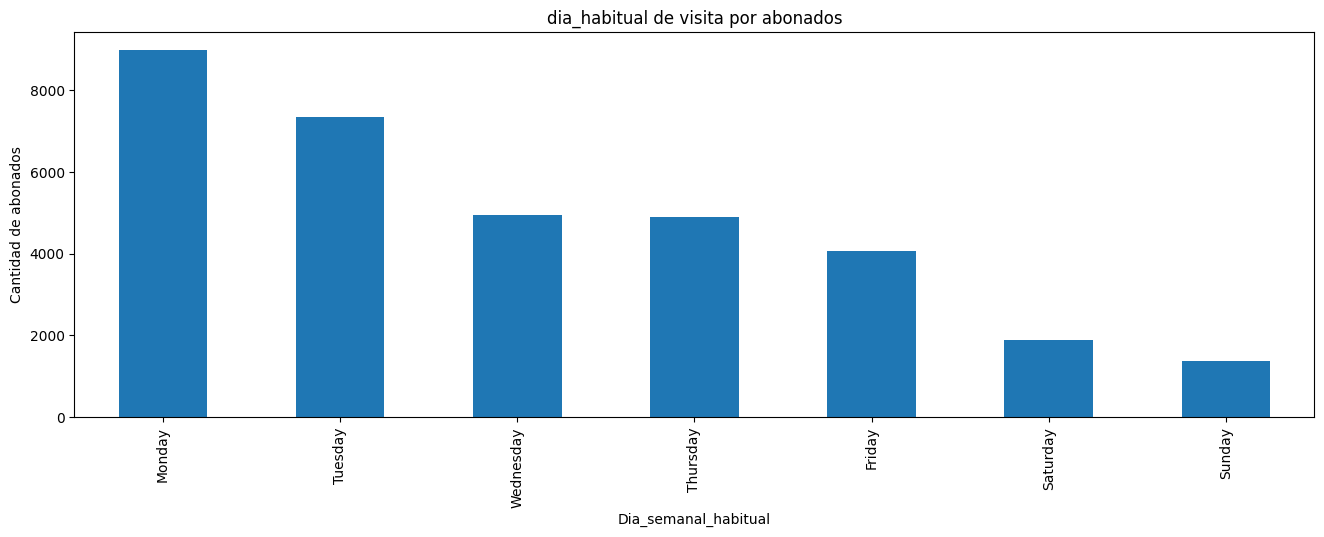

In [79]:
df["dia_habitual"].value_counts().plot(kind='bar', figsize=(16,5))
plt.title("dia_habitual de visita por abonados")
plt.ylabel('Cantidad de abonados')
plt.xlabel('Dia_semanal_habitual');

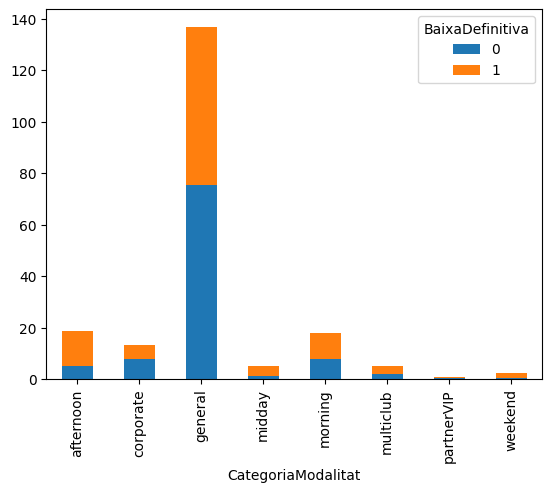

In [80]:
# Gráfico de barras de BaixaDefinitiva segun categoria de modalidad
plot1 = pd.crosstab(index=df['CategoriaModalitat'],
            columns=df['BaixaDefinitiva']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

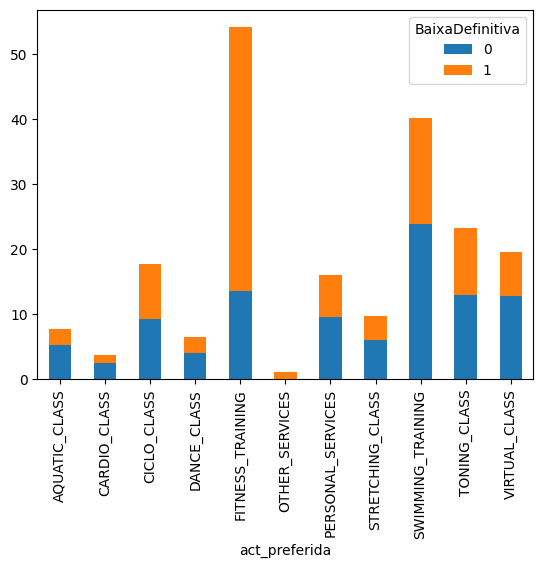

In [81]:
# Gráfico de barras de BaixaDefinitiva segun Activitat_Preferida
plot2 = pd.crosstab(index=df['act_preferida'],
            columns=df['BaixaDefinitiva']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

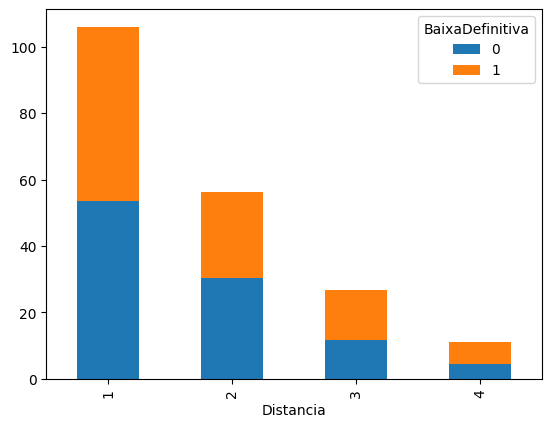

In [82]:
# Gráfico de barras de BaixaDefinitiva segun Distancia
plot3 = pd.crosstab(index=df['Distancia'],
            columns=df['BaixaDefinitiva']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

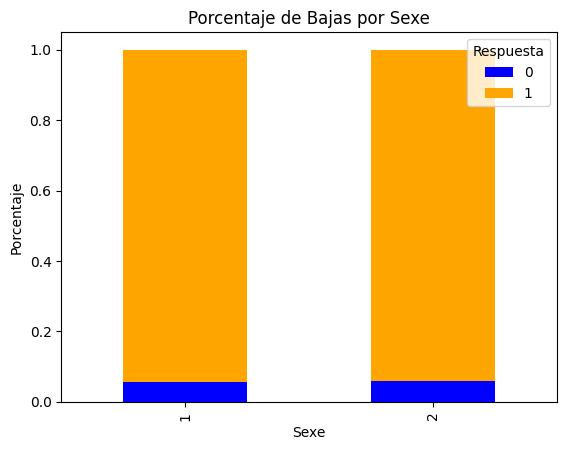

In [83]:
# Gráfico de barras NORMALIZADAS de BaixaDefinitiva segun Sexe
proportions = df.groupby(['Sexe', 'BaixaDefinitiva']).size() / df.groupby('Sexe').size()
proportions = proportions.unstack()

proportions.plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.xlabel('Sexe')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Bajas por Sexe')
plt.legend(title='Respuesta', loc='upper right')

plt.show()

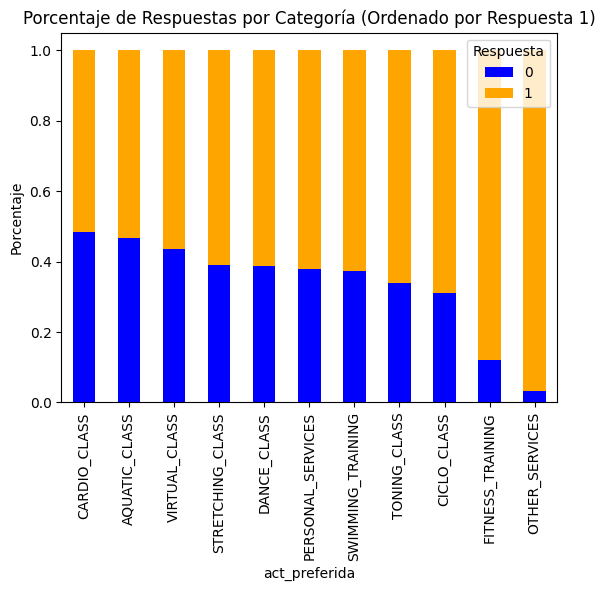

In [84]:
# Gráfico de barras NORMALIZADAS de BaixaDefinitiva segun Activitat_Preferida
proportions = df.groupby(['act_preferida', 'BaixaDefinitiva']).size() / df.groupby('act_preferida').size()
proportions = proportions.unstack()

proportions['percent_1'] = proportions[1] / (proportions[0] + proportions[1])

proportions = proportions.sort_values('percent_1', ascending=True)

proportions.drop('percent_1', axis=1).plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.xlabel('act_preferida')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Respuestas por Categoría (Ordenado por Respuesta 1)')
plt.legend(title='Respuesta', loc='upper right')

plt.show()

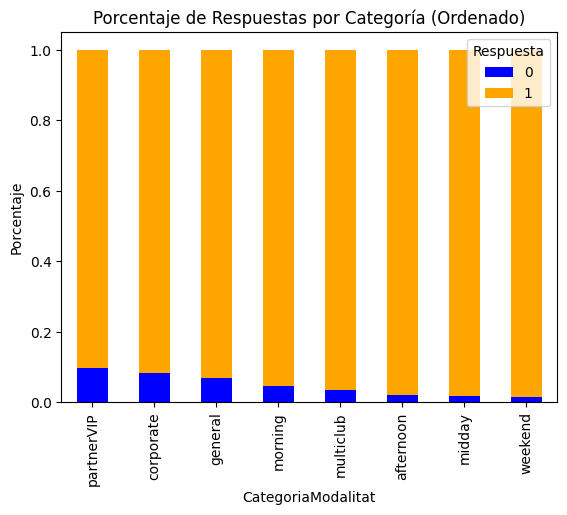

In [85]:
# Gráfico de barras NORMALIZADAS de BaixaDefinitiva segun CategoriaModalitat
proportions = df.groupby(['CategoriaModalitat', 'BaixaDefinitiva']).size() / df.groupby('CategoriaModalitat').size()
proportions = proportions.unstack()

proportions['percent_1'] = proportions[1] / (proportions[0] + proportions[1])

proportions = proportions.sort_values('percent_1', ascending=True)

proportions.drop('percent_1', axis=1).plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.xlabel('CategoriaModalitat')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Respuestas por Categoría (Ordenado)')
plt.legend(title='Respuesta', loc='upper right')

plt.show()

In [86]:
print(df.dtypes)

CentreOrigen              Int64
BaixaDefinitiva           int64
Sexe                   category
Nacionalitat           category
numero_accesos          float64
dia_habitual           category
franja_habitual        category
ServiciosExtra         category
numero_reservas         float64
antelacion_promedio     float64
Attended                float64
Cancelled               float64
NotAttended             float64
Fitness                 float64
PersTraining            float64
GroupExercise           float64
Nutrition               float64
act_preferida          category
CategoriaModalitat     category
Descuento               float64
DiasModalitatPago         int64
Mes_de_Alta            category
dias_totales            float64
period_primer_acces     float64
period_solic_baixa      float64
percent_consumit        float64
dias_sin_venir          float64
ratio_inactivo          float64
ratio_primer_us         float64
num_inscripcions          int64
Edat_Alta               float64
Distanci

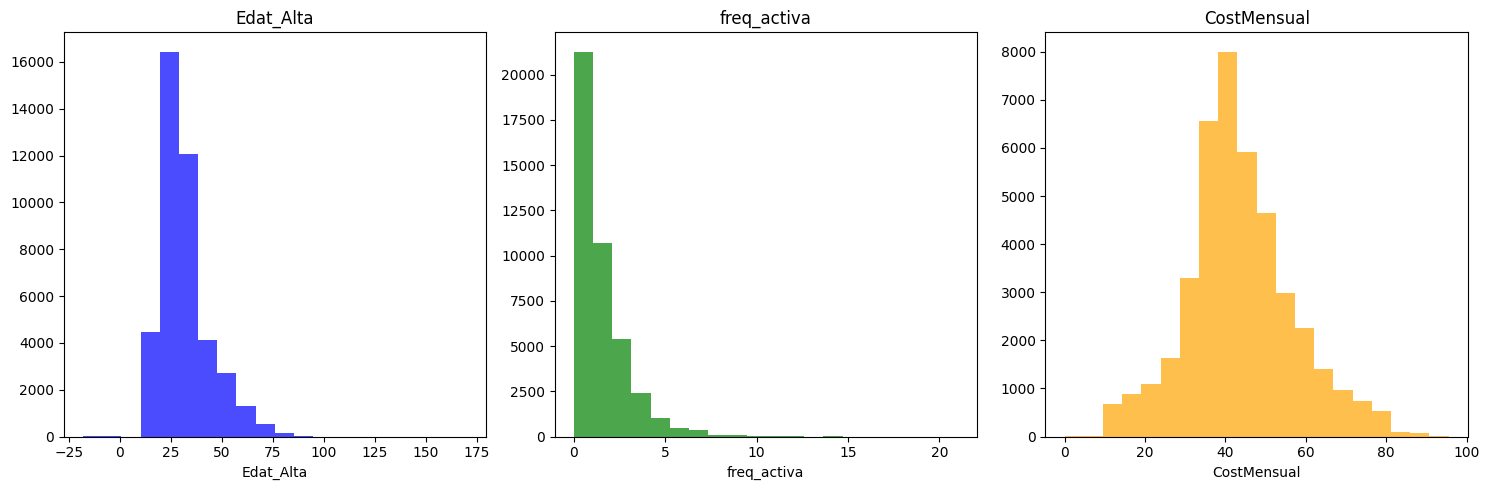

In [87]:
# Figura con tres subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de 'DataBaixa'
axs[0].hist(df['Edat_Alta'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Edat_Alta')
axs[0].set_xlabel('Edat_Alta')

# Histograma de 'Dia_semanal_habitual'
axs[1].hist(df['freq_activa'], bins=20, color='green', alpha=0.7)
axs[1].set_title('freq_activa')
axs[1].set_xlabel('freq_activa')

# Histograma de 'Edat'
axs[2].hist(df['CostMensual'], bins=20, color='orange', alpha=0.7)
axs[2].set_title('CostMensual')
axs[2].set_xlabel('CostMensual')

plt.tight_layout()

plt.show()

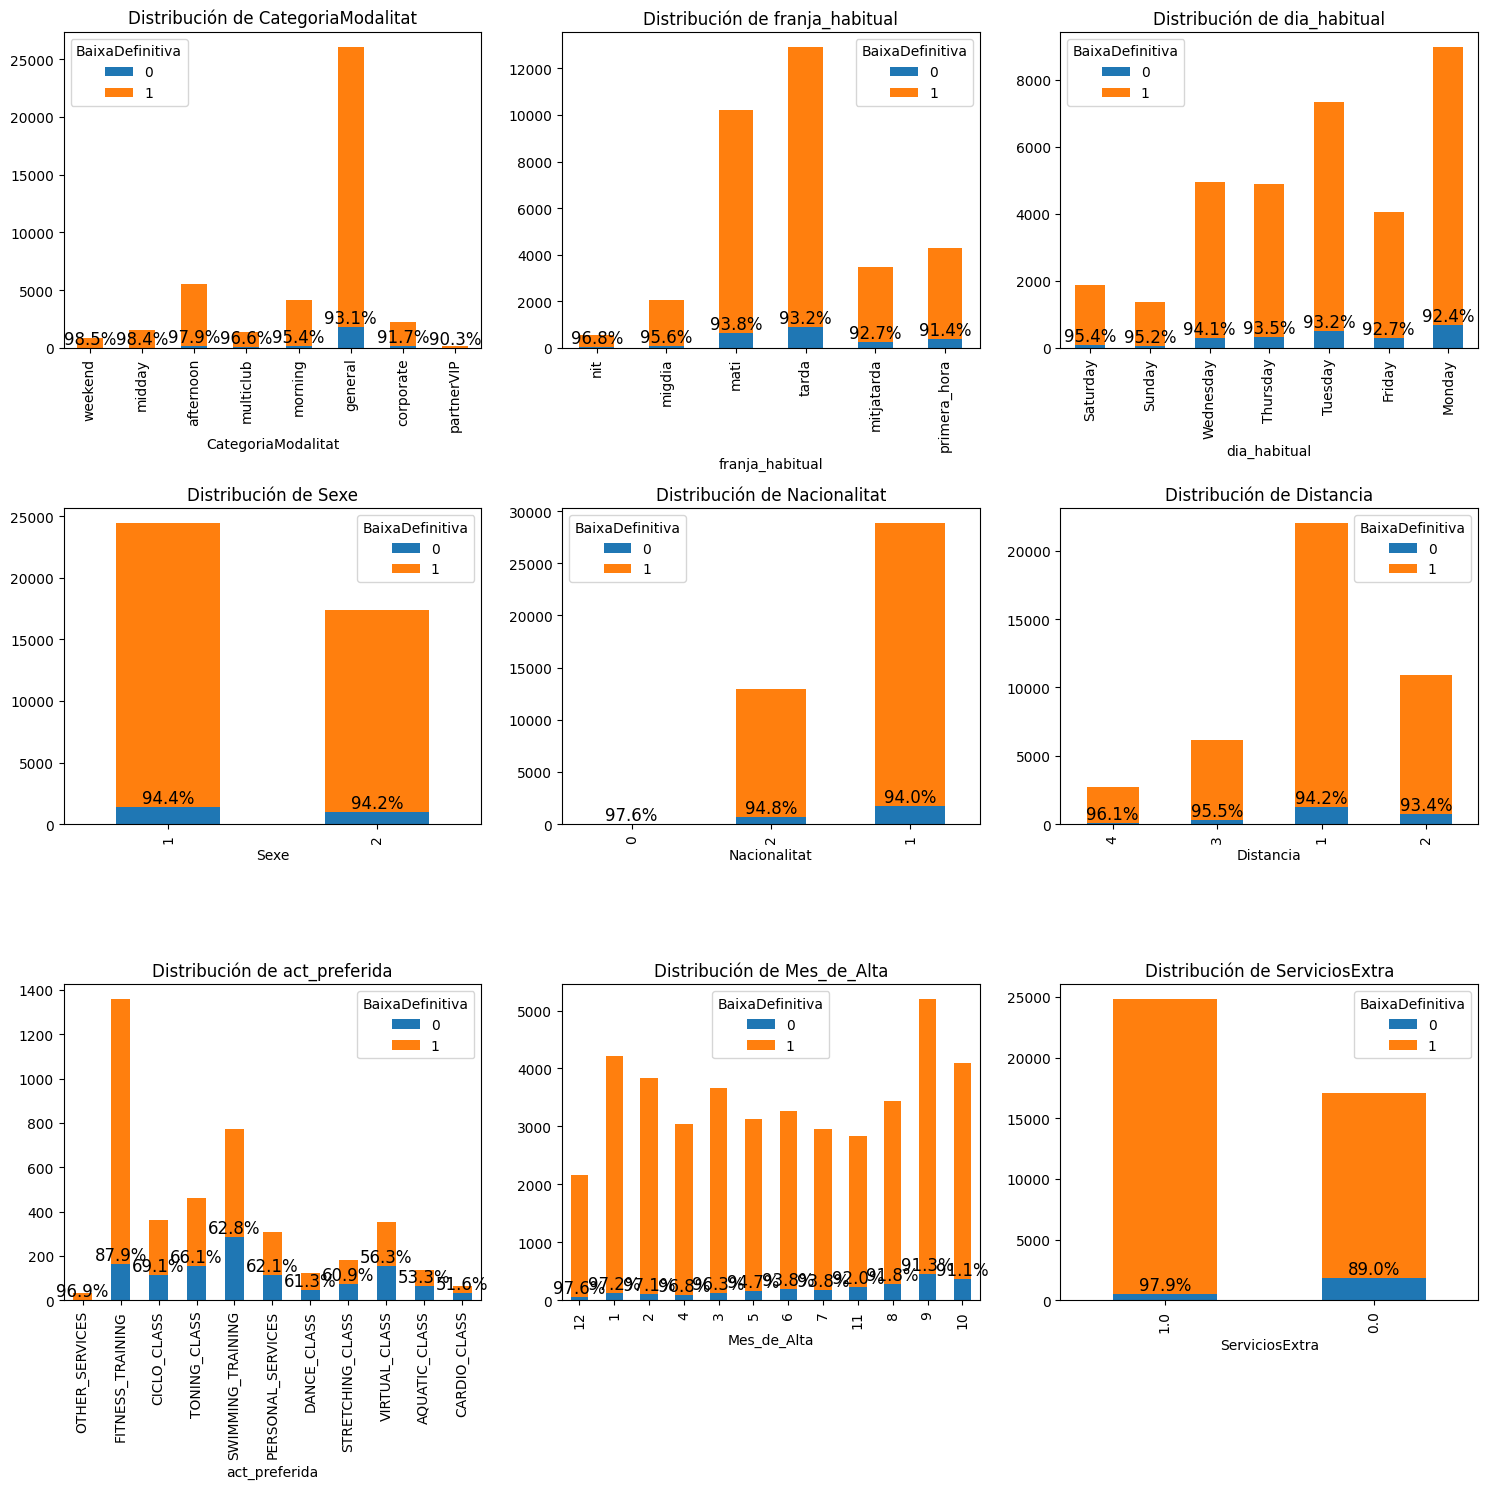

In [88]:
# Crear una figura con nueve subgráficos (tres filas y tres columnas)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Lista de variables categóricas que quieres visualizar
variables_categoricas = [
    'CategoriaModalitat', 'franja_habitual', 'dia_habitual',
    'Sexe', 'Nacionalitat', 'Distancia',
    'act_preferida', 'Mes_de_Alta', 'ServiciosExtra'
]

for i, variable in enumerate(variables_categoricas):
    df_crosstab = pd.crosstab(df[variable], df['BaixaDefinitiva'])
    #reordenar
    porcentaje_1 = (df_crosstab[1] / (df_crosstab[0] + df_crosstab[1])) * 100
    df_crosstab = df_crosstab.loc[porcentaje_1.sort_values(ascending=False).index]

    ax = df_crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f'Distribución de {variable}')

    #añadir el porcentaje
    for bar, porcentaje in zip(ax.patches, porcentaje_1.sort_values(ascending=False)):
        width, height = bar.get_width(), bar.get_height()
        x, y = bar.get_xy()
        ax.annotate(f'{porcentaje:.1f}%', (x + width / 2, y + height), ha='center', va='bottom', fontsize=12)

plt.tight_layout()

plt.show()

### Variable numericas

<Figure size 1000x600 with 0 Axes>

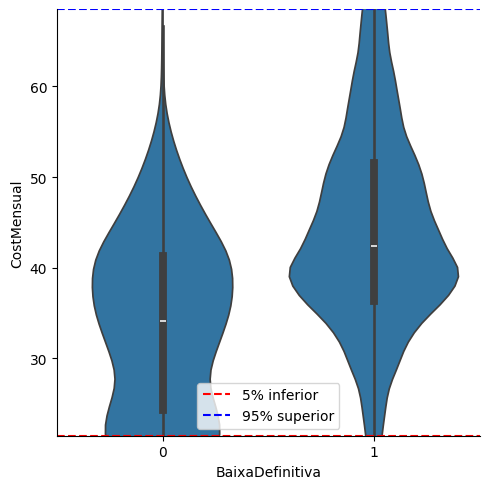

In [89]:
# Gráfico de violín de CostMensual cortando las colas
plt.figure(figsize=(10, 6))
# percentiles
percentil_inferior = 5
percentil_superior = 95

limite_inferior = df['CostMensual'].quantile(percentil_inferior / 100)
limite_superior = df['CostMensual'].quantile(percentil_superior / 100)

sns.catplot(x='BaixaDefinitiva', y='CostMensual', kind='violin', data=df)

# Controlar los límites de los ejes
plt.ylim(limite_inferior, limite_superior)

# Agregar líneas horizontales en los límites del eje y
plt.axhline(y=limite_inferior, color='red', linestyle='--', label=f'{percentil_inferior}% inferior')
plt.axhline(y=limite_superior, color='blue', linestyle='--', label=f'{percentil_superior}% superior')

plt.legend()

# Mostrar el gráfico
plt.show()

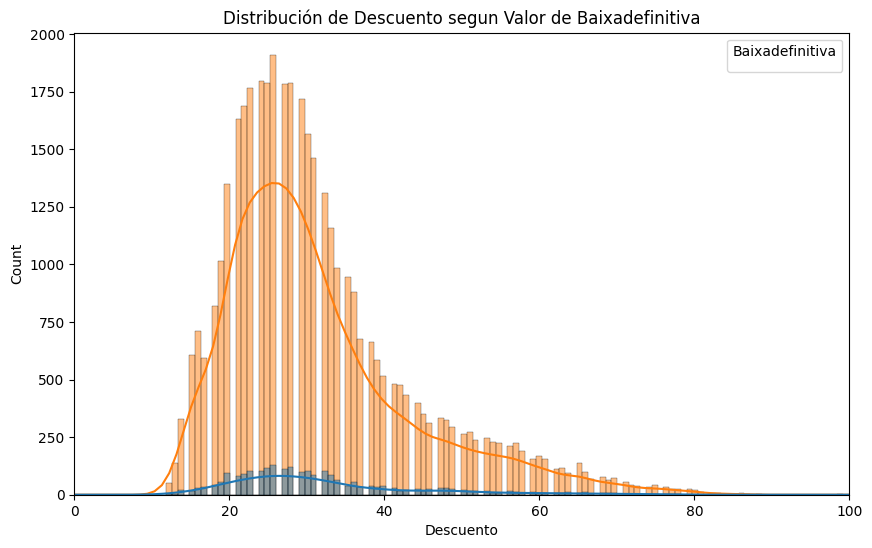

In [90]:
plt.figure(figsize=(10, 6))
# Distribución de Descuento segun valor de 'Baixadefinitiva'
sns.histplot(df, x='Edat_Alta', kde=True, hue='BaixaDefinitiva')

# Configuracion
plt.title('Distribución de Descuento segun Valor de Baixadefinitiva')
plt.xlabel('Descuento')
plt.legend(title='Baixadefinitiva')
plt.xlim(0, 100)

plt.show()

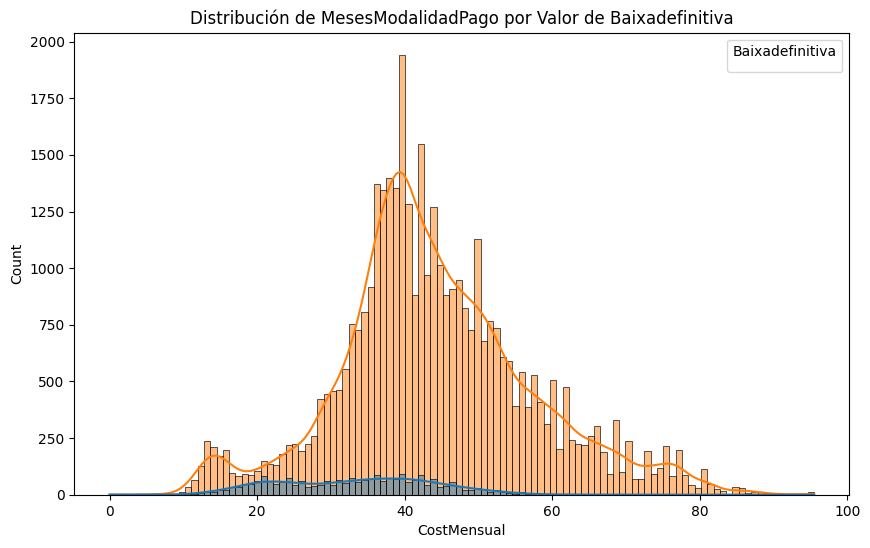

In [91]:
plt.figure(figsize=(10, 6))

# Distribución de MesesModalidadPago segun valor de 'Baixadefinitiva'
sns.histplot(data=df, x='CostMensual', kde=True, hue='BaixaDefinitiva')

# Configuracion
plt.title('Distribución de MesesModalidadPago por Valor de Baixadefinitiva')
plt.xlabel('CostMensual')
plt.legend(title='Baixadefinitiva')
#plt.xlim(0, 30)

# Mostrar el gráfico
plt.show()

In [92]:
# Lista de variables continuas que quieres visualizar
variables_continuas = ['Edat_Alta','DiasModalitatPago','dias_totales','CostMensual','PreuBase','ratio_inactivo','dias_sin_venir','numero_accesos','freq_activa','freq_30dias', 'Attended', 'Descuento']


<ipython-input-93-c155bc3bc852>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', cut=0, linewidth=2)
<ipython-input-93-c155bc3bc852>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', cut=0, linewidth=2)
<ipython-input-93-c155bc3bc852>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', cut=0, li

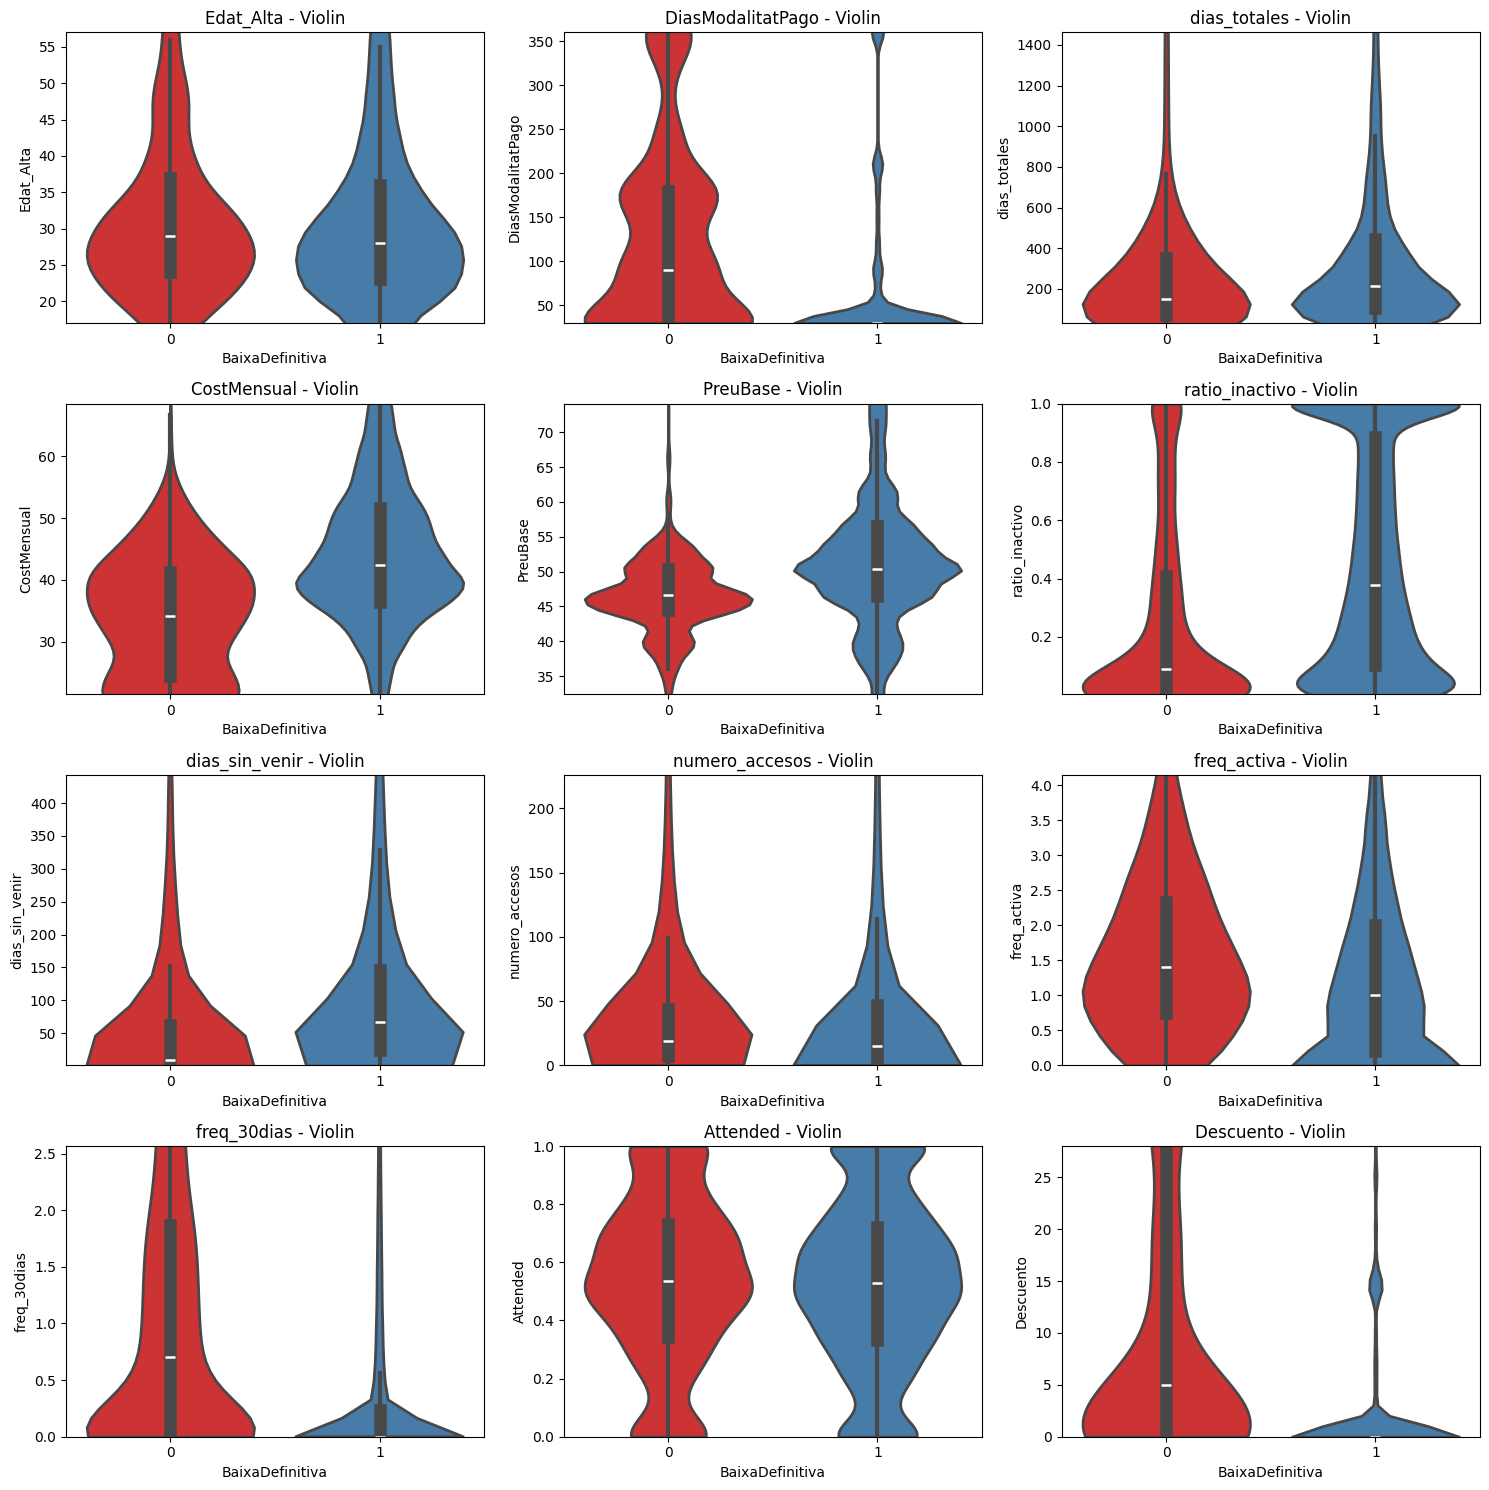

In [93]:
percentil_inferior = 5
percentil_superior = 95

# Crear una figura con 12 subgráficos
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Iterar sobre las variables continuas y crear los subgráficos
for i, variable in enumerate(variables_continuas):
    # Calcular percentiles
    limite_inferior = df[variable].quantile(percentil_inferior / 100)
    limite_superior = df[variable].quantile(percentil_superior / 100)

    # gráfico de violín segun BaixaDefinitiva
    sns.violinplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', cut=0, linewidth=2)

    # Limitar por percentiles
    axs[i // 3, i % 3].set_ylim(limite_inferior, limite_superior)

    # Títulos y etiquetas
    axs[i // 3, i % 3].set_title(f'{variable} - Violin')
    #axs[i // 3, i % 3].set_xlabel('BaixaDefinitiva')
    axs[i // 3, i % 3].set_ylabel(variable)

plt.tight_layout()

plt.show()

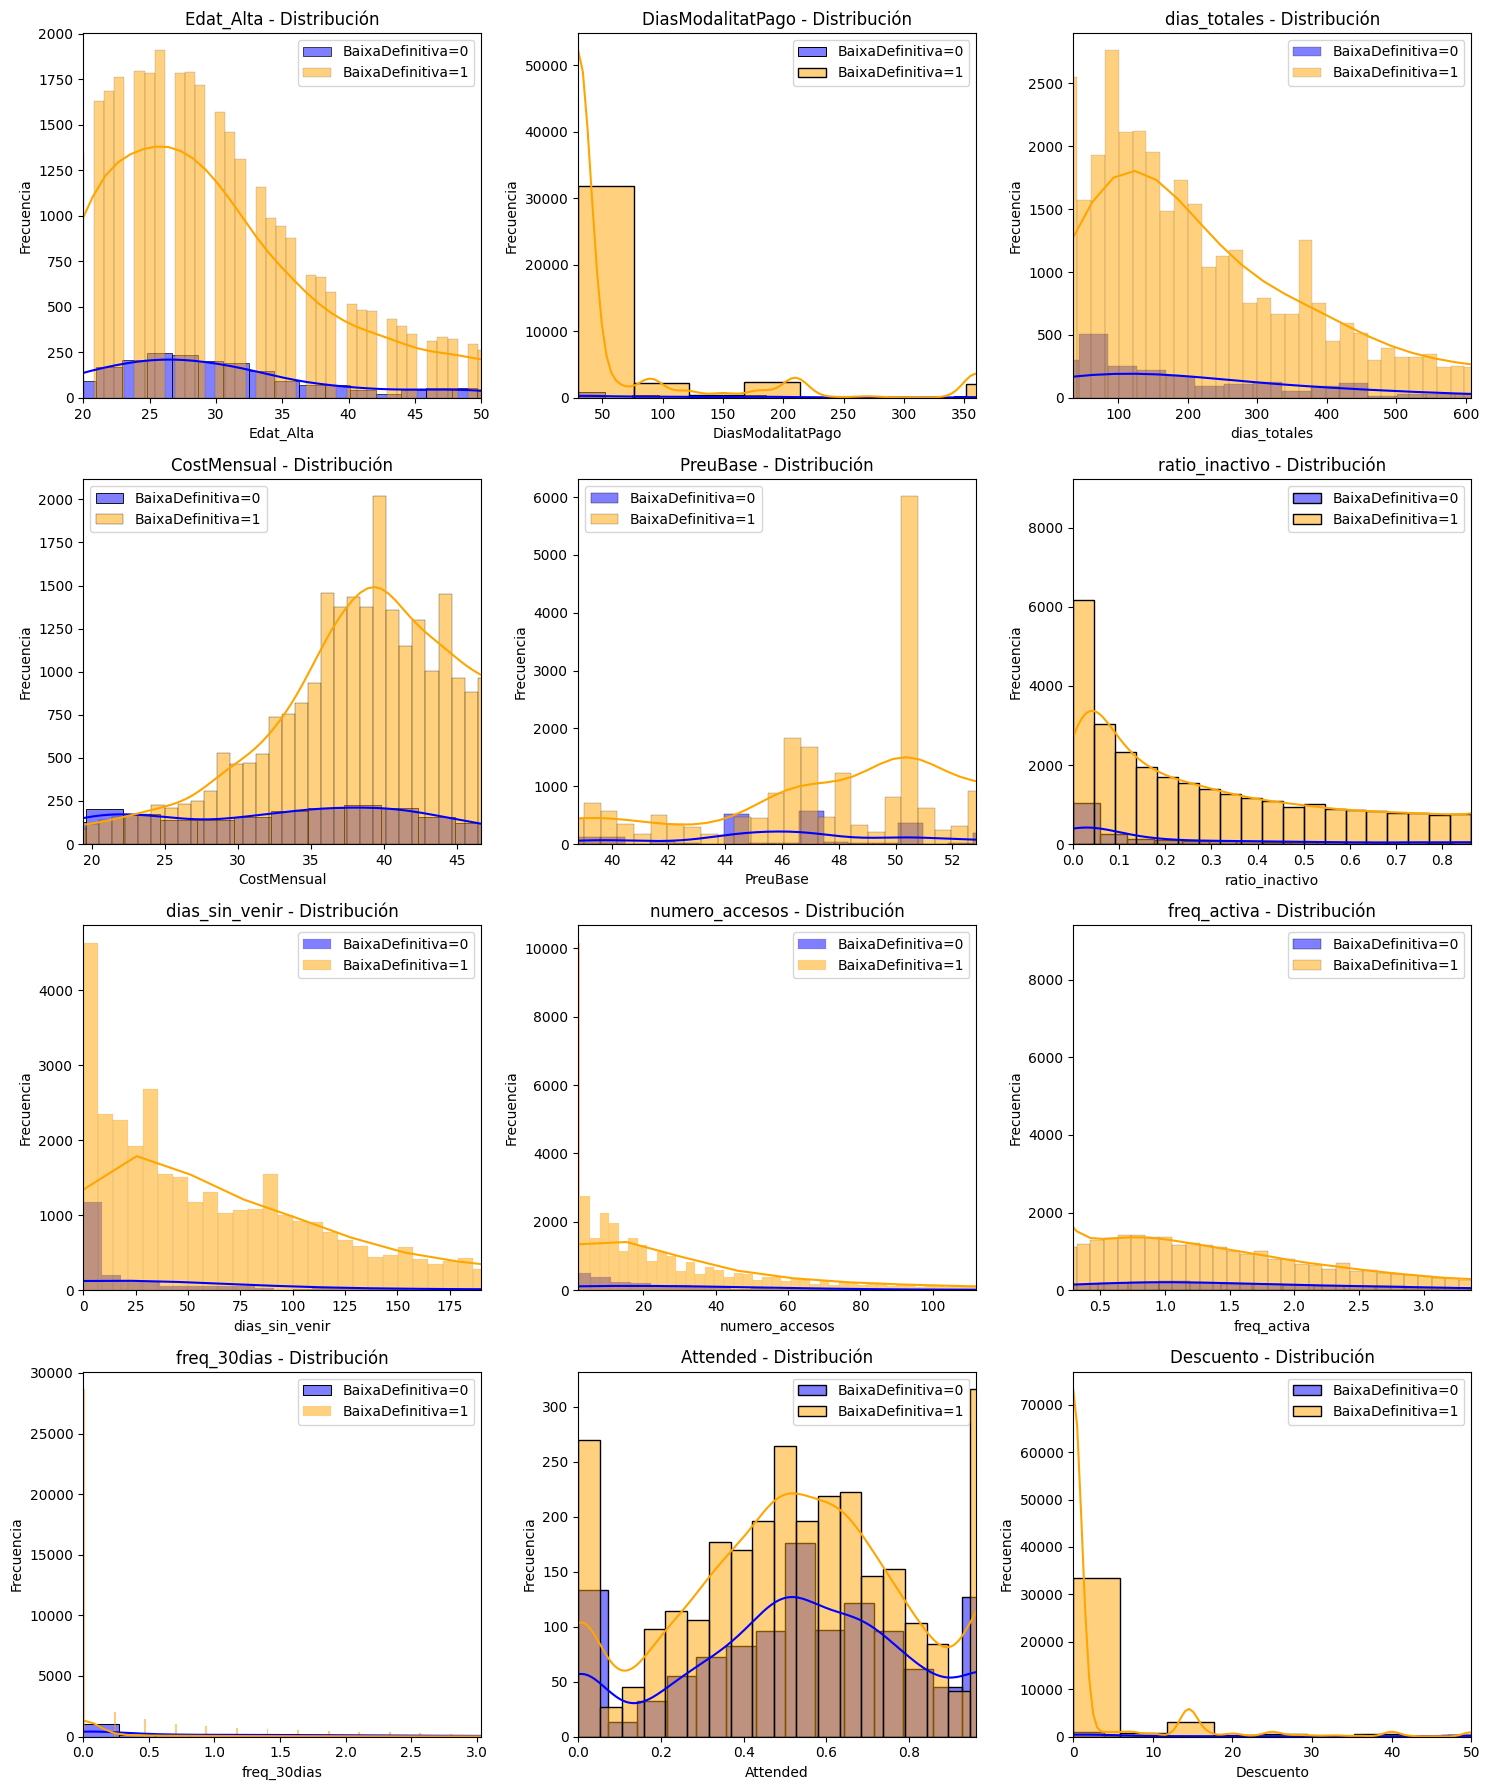

In [94]:
percentil_inferior = 10
percentil_superior = 90

fig, axs = plt.subplots(4, 3, figsize=(15, 18))

for i, variable in enumerate(variables_continuas):
    # Calcular percentiles
    limite_inferior = df[df['BaixaDefinitiva'] == 0][variable].quantile(percentil_inferior / 100)
    limite_superior = df[df['BaixaDefinitiva'] == 0][variable].quantile(percentil_superior / 100)

    # Superponer gráfico de curva de distribución por BaixaDefinitiva
    sns.histplot(df[df['BaixaDefinitiva'] == 0][variable], kde=True, ax=axs[i // 3, i % 3], color='blue', label=f'BaixaDefinitiva=0')
    sns.histplot(df[df['BaixaDefinitiva'] == 1][variable], kde=True, ax=axs[i // 3, i % 3], color='orange', label=f'BaixaDefinitiva=1')

    # Limitar por percentiles
    axs[i // 3, i % 3].set_xlim(limite_inferior, limite_superior)

    # Títulos y etiquetas
    axs[i // 3, i % 3].set_title(f'{variable} - Distribución')
    axs[i // 3, i % 3].set_xlabel(variable)
    axs[i // 3, i % 3].set_ylabel('Frecuencia')

    axs[i // 3, i % 3].legend()

plt.tight_layout()

plt.show()

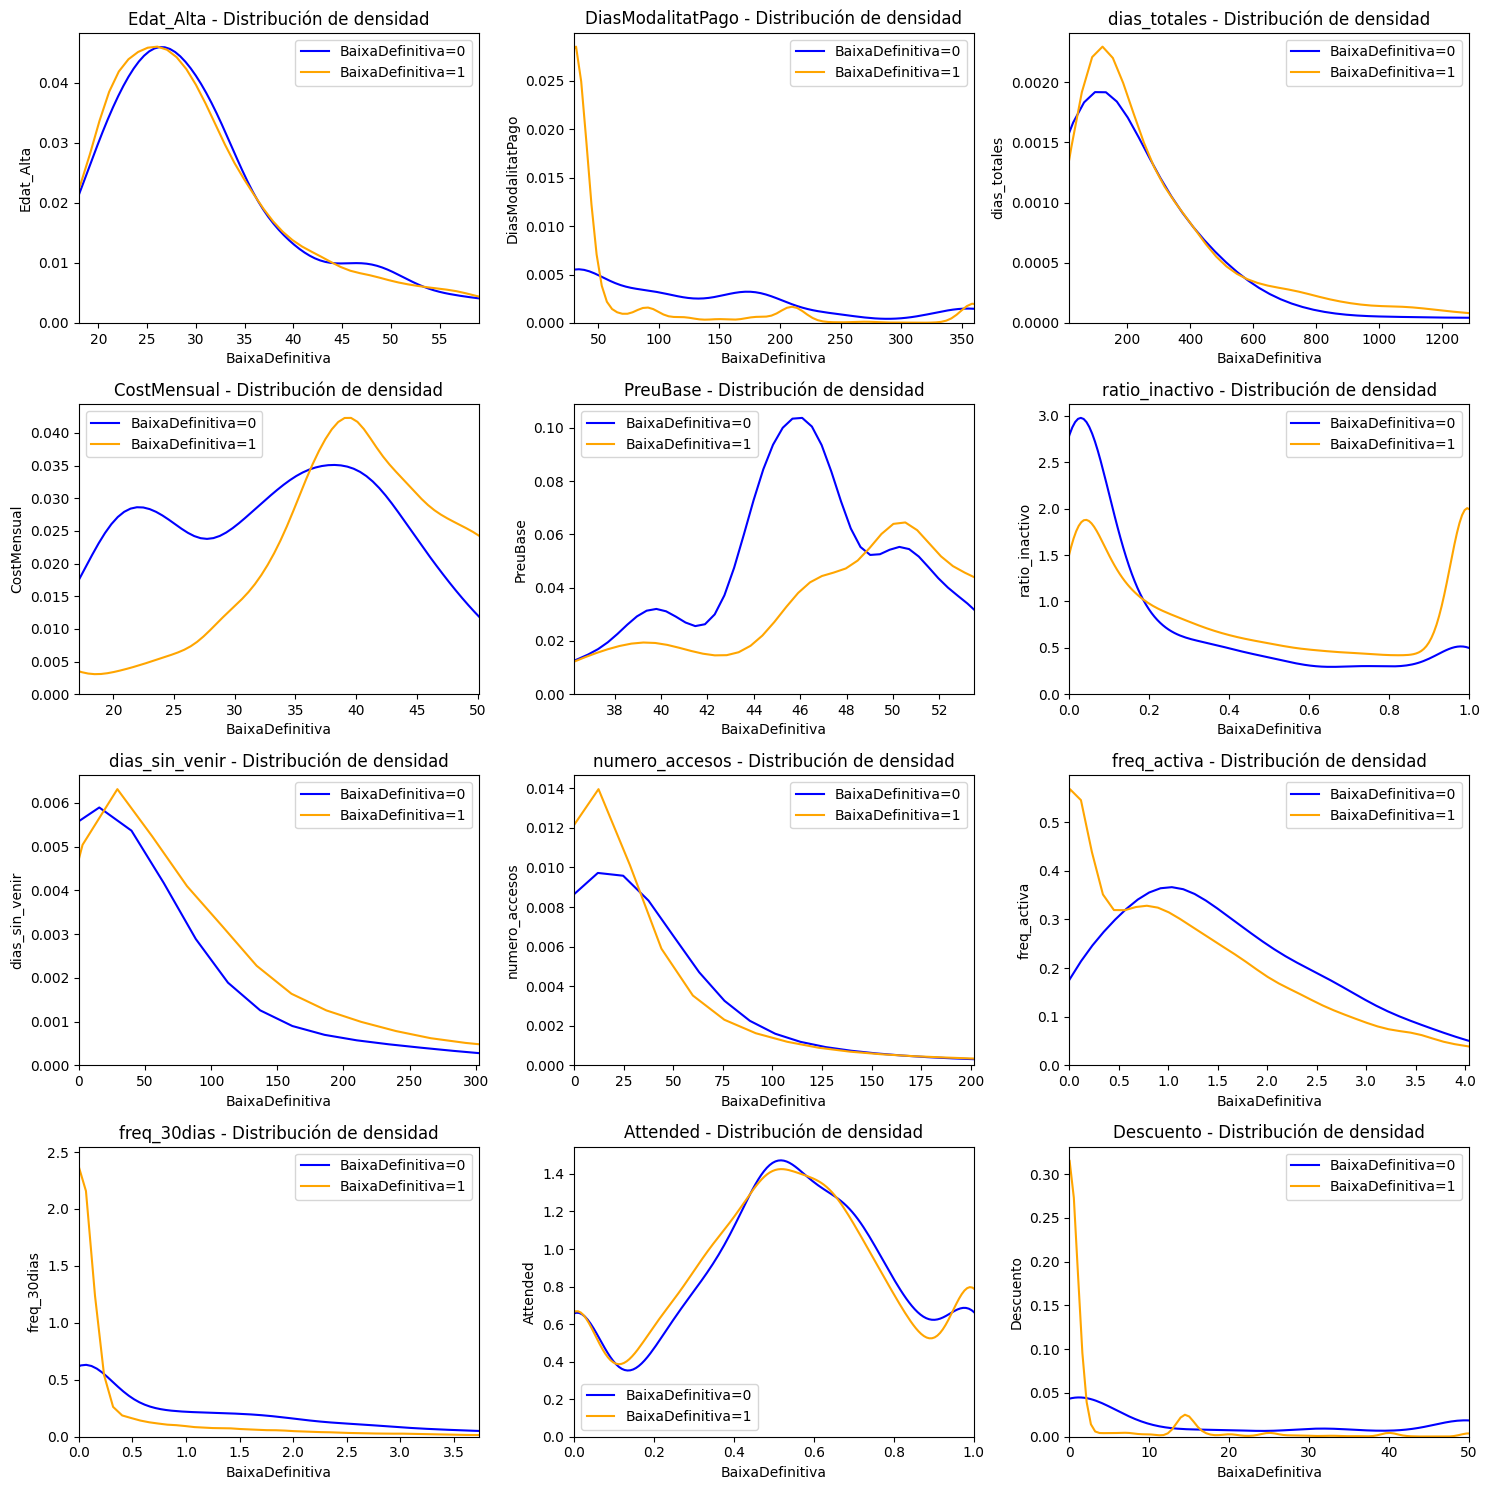

In [95]:
percentil_inferior = 5
percentil_superior = 95

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, variable in enumerate(variables_continuas):
    # Calcular percentiles
    limite_inferior = df[df['BaixaDefinitiva'] == 0][variable].quantile(percentil_inferior / 100)
    limite_superior = df[df['BaixaDefinitiva'] == 0][variable].quantile(percentil_superior / 100)

    # Superponer gráfico de curva de distribución por BaixaDefinitiva
    sns.kdeplot(df[df['BaixaDefinitiva'] == 0][variable], ax=axs[i // 3, i % 3], color='blue', label=f'BaixaDefinitiva=0')
    sns.kdeplot(df[df['BaixaDefinitiva'] == 1][variable], ax=axs[i // 3, i % 3], color='orange', label=f'BaixaDefinitiva=1')

    # Limitar por percentiles
    axs[i // 3, i % 3].set_xlim(limite_inferior, limite_superior)

    # Títulos y etiquetas
    axs[i // 3, i % 3].set_title(f'{variable} - Distribución de densidad')
    axs[i // 3, i % 3].set_xlabel('BaixaDefinitiva')
    axs[i // 3, i % 3].set_ylabel(variable)

    axs[i // 3, i % 3].legend()

plt.tight_layout()

plt.show()

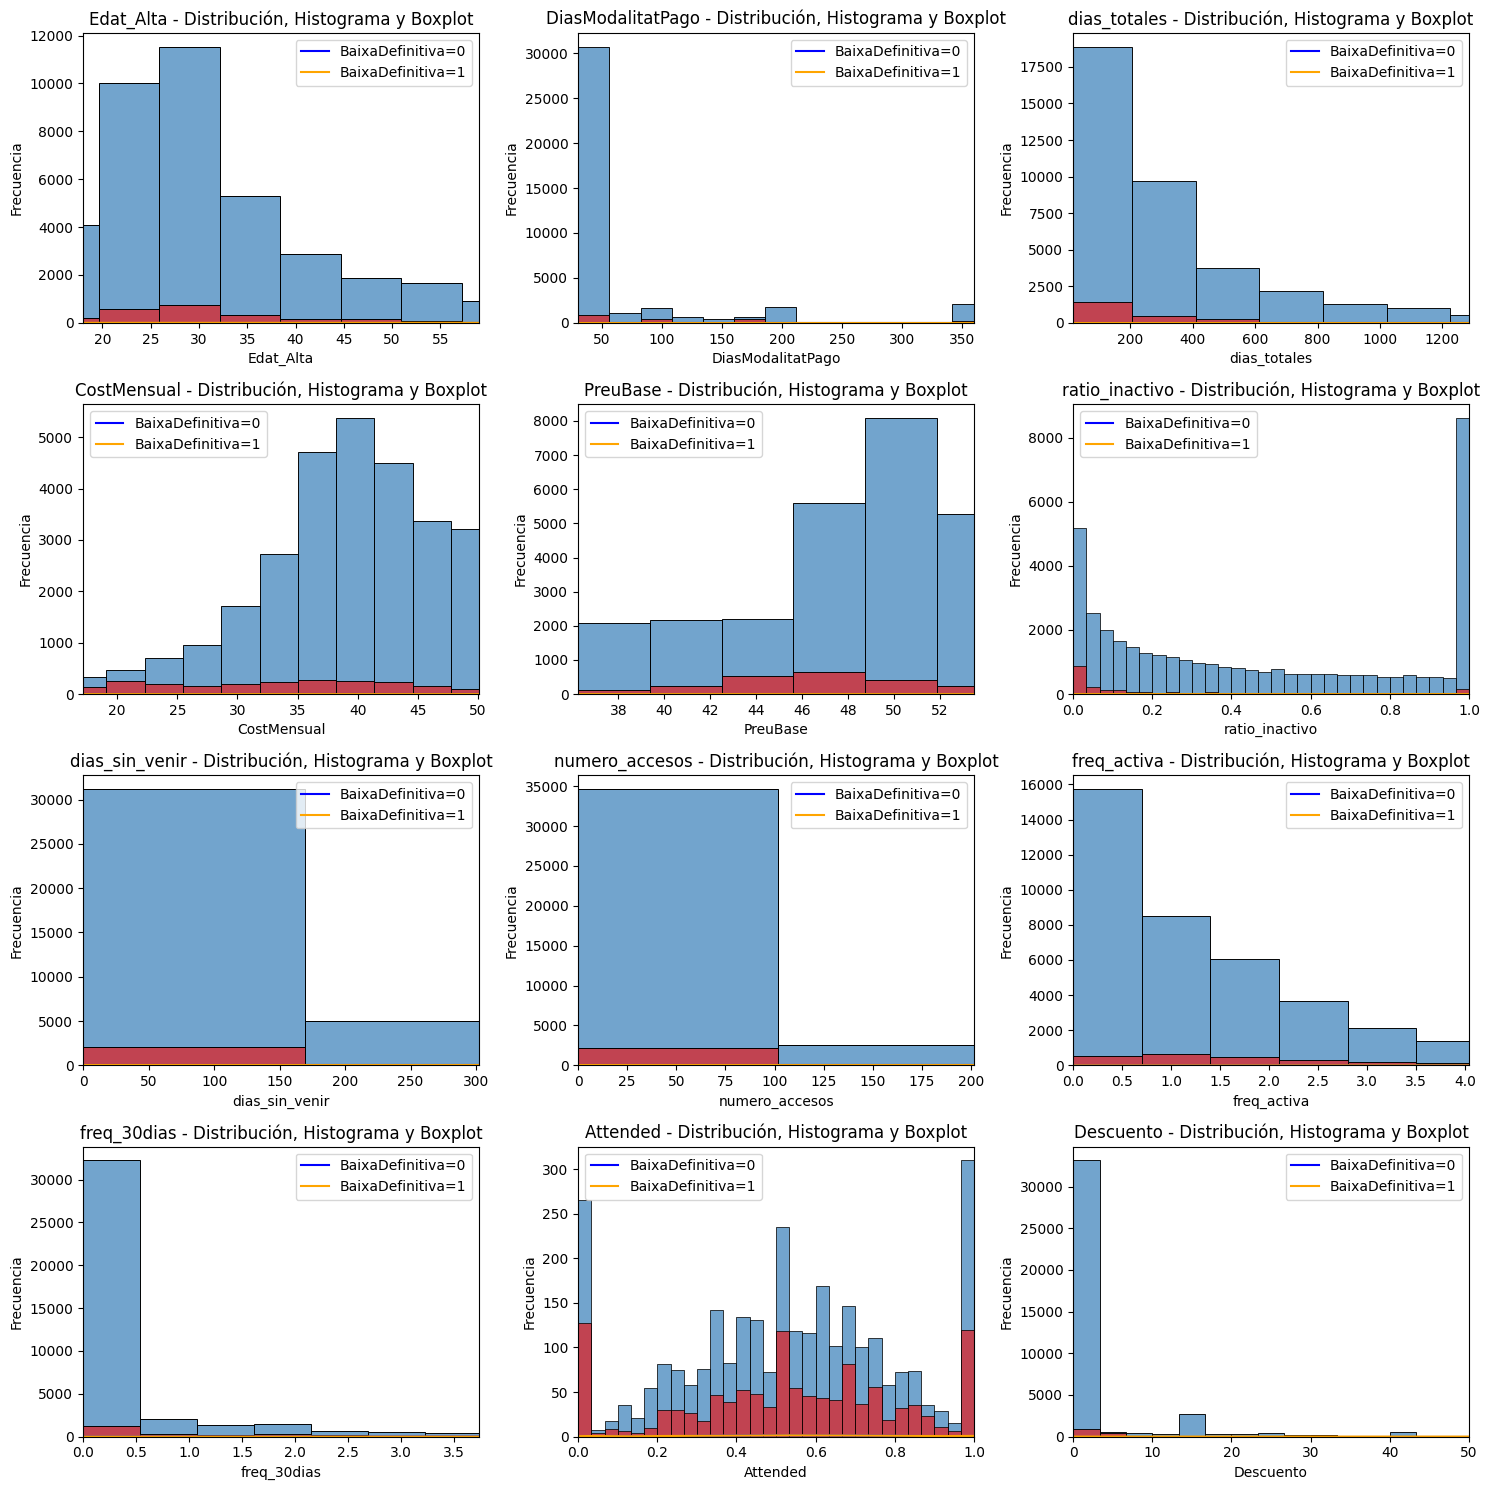

In [96]:
percentil_inferior = 5
percentil_superior = 95

# Crear una figura con 12 subgráficos (curvas de distribución, histogramas y boxplots)
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Iterar sobre las variables continuas y crear los subgráficos
for i, variable in enumerate(variables_continuas):
    # Calcular percentiles
    limite_inferior = df[df['BaixaDefinitiva'] == 0][variable].quantile(percentil_inferior / 100)
    limite_superior = df[df['BaixaDefinitiva'] == 0][variable].quantile(percentil_superior / 100)

    # Superponer gráfico de curva de distribución por BaixaDefinitiva
    sns.kdeplot(df[df['BaixaDefinitiva'] == 0][variable], ax=axs[i // 3, i % 3], color='blue', label=f'BaixaDefinitiva=0')
    sns.kdeplot(df[df['BaixaDefinitiva'] == 1][variable], ax=axs[i // 3, i % 3], color='orange', label=f'BaixaDefinitiva=1')

    # Superponer histograma
    sns.histplot(data=df, x=variable, hue='BaixaDefinitiva', bins=30, kde=False, ax=axs[i // 3, i % 3], alpha=0.7, palette='Set1')

    # Limitar por percentiles
    axs[i // 3, i % 3].set_xlim(limite_inferior, limite_superior)

    # Títulos y etiquetas
    axs[i // 3, i % 3].set_title(f'{variable} - Distribución, Histograma y Boxplot')
    axs[i // 3, i % 3].set_ylabel('Frecuencia')
    axs[i // 3, i % 3].set_xlabel(variable)

    # Mostrar leyenda
    axs[i // 3, i % 3].legend()

plt.tight_layout()

plt.show()

<ipython-input-97-5227d1a0f700>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', boxprops=dict(alpha=0.3))
<ipython-input-97-5227d1a0f700>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', boxprops=dict(alpha=0.3))
<ipython-input-97-5227d1a0f700>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', boxpro

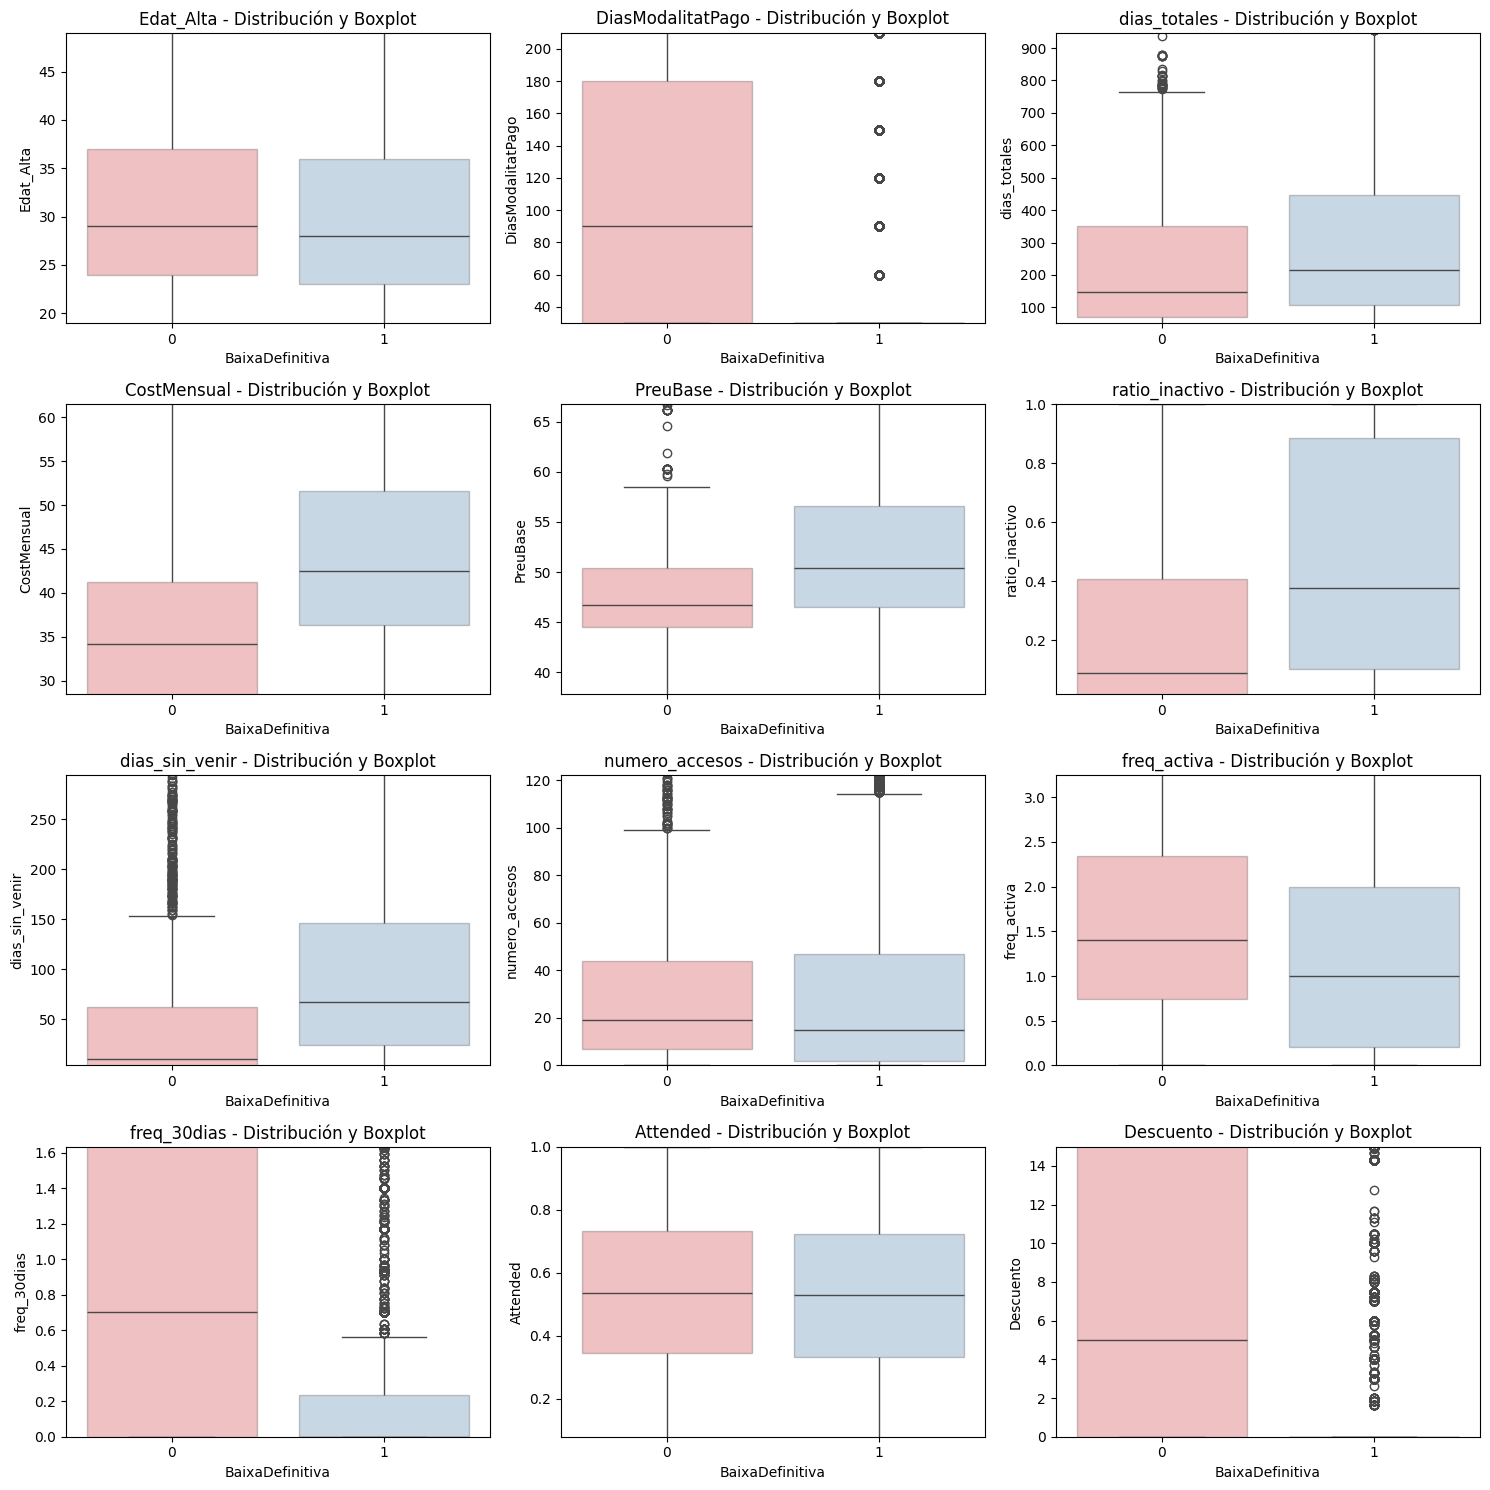

In [97]:
percentil_inferior = 10
percentil_superior = 90

# Crear una figura con 6 subgráficos (curvas de distribución y boxplots)
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Iterar sobre las variables continuas y crear los subgráficos
for i, variable in enumerate(variables_continuas):
    # Calcular percentiles
    limite_inferior = df[variable].quantile(percentil_inferior / 100)
    limite_superior = df[variable].quantile(percentil_superior / 100)

    # Superponer gráfico de boxplot
    sns.boxplot(x='BaixaDefinitiva', y=variable, data=df, ax=axs[i // 3, i % 3], palette='Set1', boxprops=dict(alpha=0.3))

    # Limitar por percentiles
    axs[i // 3, i % 3].set_ylim(limite_inferior, limite_superior)

    # Títulos y etiquetas
    axs[i // 3, i % 3].set_title(f'{variable} - Distribución y Boxplot')
    axs[i // 3, i % 3].set_xlabel('BaixaDefinitiva')
    axs[i // 3, i % 3].set_ylabel(variable)

plt.tight_layout()

plt.show()

### Correlacion

<ipython-input-98-a708d3bffc5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones=df.corr()


CentreOrigen  BaixaDefinitiva  numero_accesos  \
CentreOrigen             1.000000        -0.043382        0.002201   
BaixaDefinitiva         -0.043382         1.000000        0.000592   
numero_accesos           0.002201         0.000592        1.000000   
numero_reservas         -0.042469        -0.008544        0.301803   
antelacion_promedio     -0.000711         0.019508        0.058504   
Attended                -0.029137        -0.008077        0.132821   
Cancelled                0.033824         0.028135       -0.032461   
NotAttended             -0.000121        -0.019810       -0.127785   
Fitness                 -0.033662         0.265335        0.112819   
PersTraining             0.005169        -0.063573       -0.011804   
GroupExercise            0.027711        -0.220953       -0.100371   
Nutrition                0.006550         0.043355        0.004601   
Descuento                0.007196        -0.322941        0.027540   
DiasModalitatPago        0.007656        -0.177136        0.120040   
dias_totales             0.007143         0.032317        0.666406   
period_primer_acces      0.002737         0.065163       -0.003224   
period_solic_baixa       0.010292         0.026503        0.663629   
percent_consumit         0.029894         0.083601        0.134627   
dias_sin_venir           0.024912         0.053940       -0.032615   
ratio_inactivo           0.021361         0.130021       -0.343152   
ratio_primer_us          0.016913         0.083273       -0.210472   
num_inscripcions        -0.019259         0.081178       -0.003966   
Edat_Alta                0.028156        -0.013498        0.151572   
Distancia                0.050732         0.020668       -0.034190   
freq_activa             -0.019621        -0.050438        0.238296   
freq_30dias             -0.011539        -0.156694        0.137095   
freq_90dias             -0.019434        -0.127645        0.177106   
freq_180dias            -0.023183        -0.105613        0.230245   
PreuBase                -0.005427         0.106233       -0.055054   
CostMensual              0.007964         0.187672        0.001013   

                     numero_reservas  antelacion_promedio  Attended  \
CentreOrigen               -0.042469            -0.000711 -0.029137   
BaixaDefinitiva            -0.008544             0.019508 -0.008077   
numero_accesos              0.301803             0.058504  0.132821   
numero_reservas             1.000000             0.108098 -0.000477   
antelacion_promedio         0.108098             1.000000 -0.143183   
Attended                   -0.000477            -0.143183  1.000000   
Cancelled                   0.047804             0.190203 -0.621824   
NotAttended                -0.049815            -0.025877 -0.564176   
Fitness                     0.103036            -0.279359  0.120094   
PersTraining               -0.164897             0.148692  0.105024   
GroupExercise               0.004725             0.138726 -0.190265   
Nutrition                  -0.047549             0.243084  0.104719   
Descuento                  -0.044621             0.054984 -0.057515   
DiasModalitatPago           0.021800             0.044969 -0.019240   
dias_totales                0.181696             0.044799  0.082213   
period_primer_acces        -0.044922             0.013088 -0.090509   
period_solic_baixa          0.180955             0.042734  0.082258   
percent_consumit           -0.012376             0.017547  0.024659   
dias_sin_venir             -0.125503             0.031616 -0.139290   
ratio_inactivo             -0.283541             0.024538 -0.241333   
ratio_primer_us            -0.135188            -0.008361 -0.197651   
num_inscripcions            0.046100             0.009380  0.019792   
Edat_Alta                   0.015864             0.186565 -0.001690   
Distancia                  -0.023352             0.033427  0.002347   
freq_activa                 0.190077             0.019016  0.154658   
freq

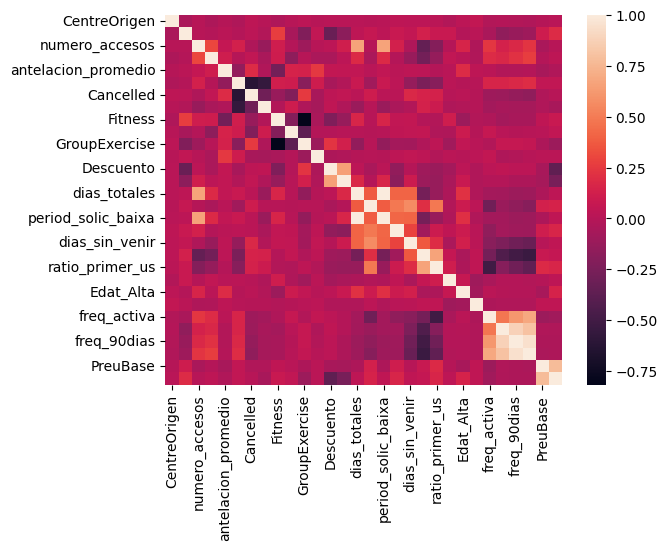

In [98]:
correlaciones=df.corr()
sns.heatmap(correlaciones)
correlaciones

In [99]:
correlaciones = df.corr()

# Obtener las correlaciones más fuertes (positivas) excluyendo una variable consigo misma
top_correlaciones_positivas = (
    correlaciones.where(np.triu(np.ones(correlaciones.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
    .drop_duplicates()
    .head(50))
print("Top 5 correlaciones positivas:")
print(top_correlaciones_positivas)

# Obtener las correlaciones más fuertes (negativas) excluyendo una variable consigo misma
top_correlaciones_negativas = (
    correlaciones.where(np.triu(np.ones(correlaciones.shape), k=1).astype(bool))
    .stack()
    .sort_values()
    .drop_duplicates()
    .head(50))
print("\nTop 5 correlaciones negativas:")
print(top_correlaciones_negativas)

Top 5 correlaciones positivas:
dias_totales         period_solic_baixa     0.998134
freq_90dias          freq_180dias           0.948656
freq_30dias          freq_90dias            0.874720
                     freq_180dias           0.802406
PreuBase             CostMensual            0.778738
freq_activa          freq_180dias           0.685523
numero_accesos       dias_totales           0.666406
ratio_inactivo       ratio_primer_us        0.665685
numero_accesos       period_solic_baixa     0.663629
Descuento            DiasModalitatPago      0.650205
freq_activa          freq_90dias            0.612417
period_primer_acces  dias_sin_venir         0.566023
                     ratio_primer_us        0.487044
                     percent_consumit       0.482237
freq_activa          freq_30dias            0.476217
period_solic_baixa   percent_consumit       0.413347
                     dias_sin_venir         0.410345
dias_totales         dias_sin_venir         0.409890
               

<ipython-input-99-47ee20b9042d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.corr()


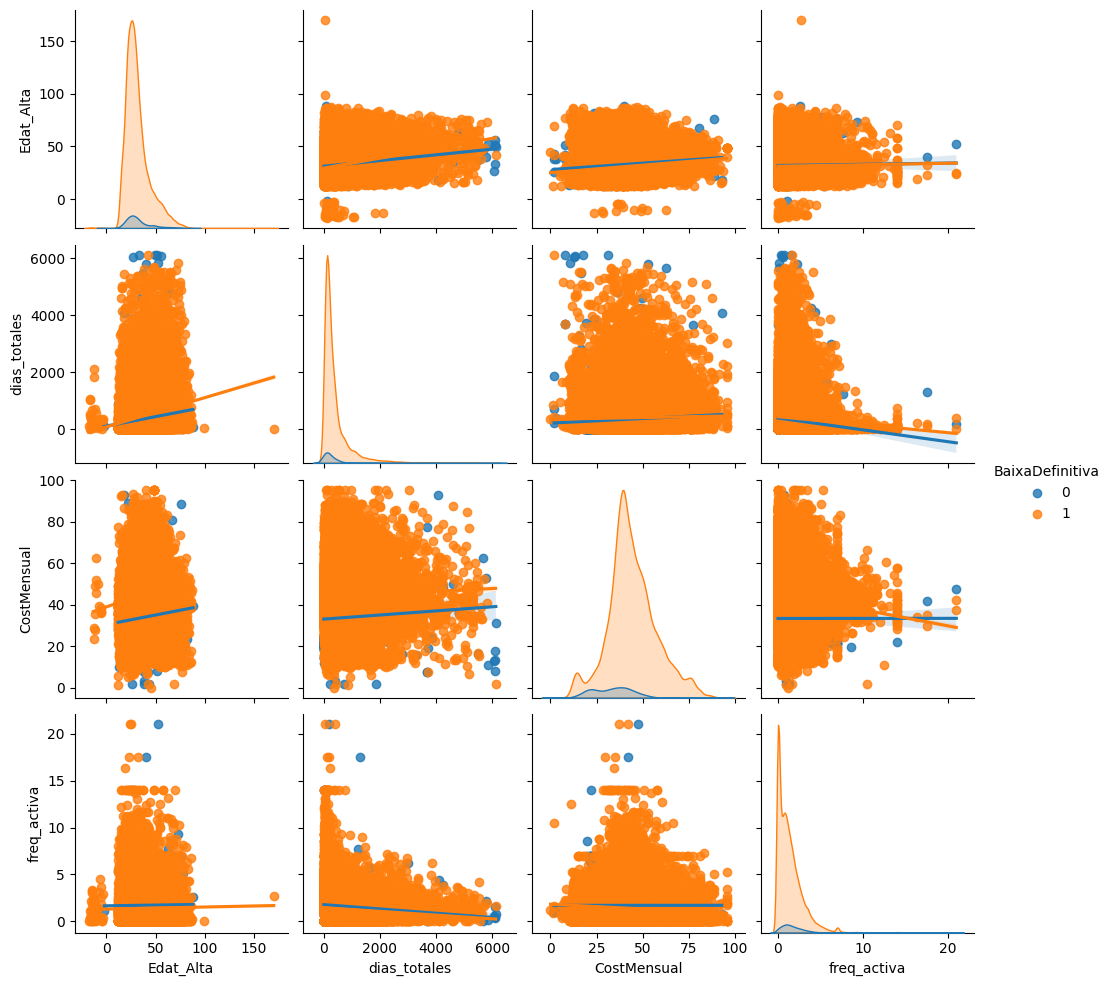

In [100]:
df = df[['Edat_Alta','dias_totales','CostMensual','freq_activa','BaixaDefinitiva']]
sns.pairplot(df, hue='BaixaDefinitiva',kind="reg")

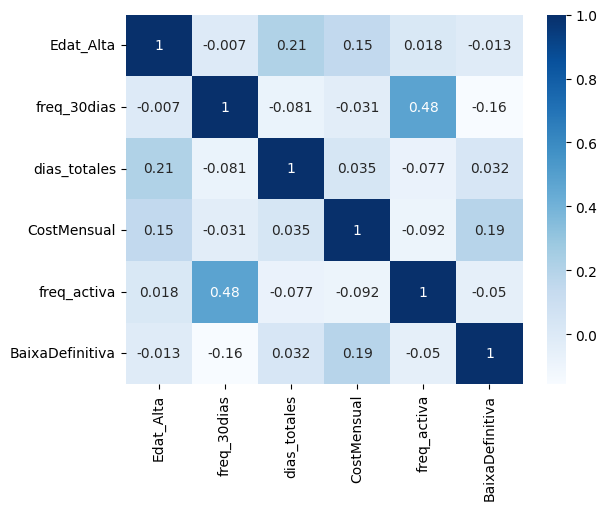

In [101]:
df=data_basic
sns.heatmap(df[['Edat_Alta','freq_30dias','dias_totales','CostMensual','freq_activa','BaixaDefinitiva']].corr(), annot=True, cmap = 'Blues')
plt.show()

(0.0, 100.0)

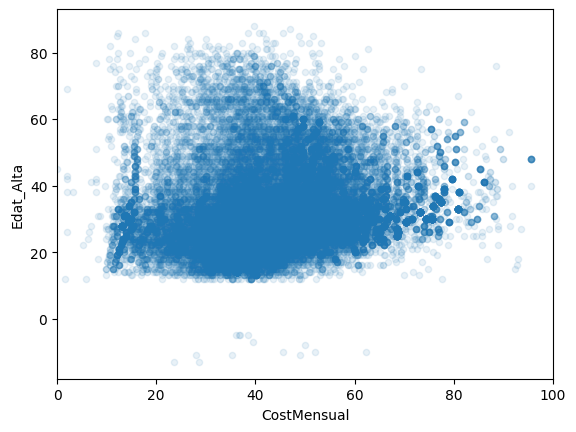

In [102]:
# Diagrama de dispersión ratio_inactivo y dias_totales:

var = 'CostMensual'
data = pd.concat([df['Edat_Alta'], df[var]], axis=1)

data.plot.scatter(x=var, y='Edat_Alta', alpha = 0.1)
plt.xlim(0, 100)

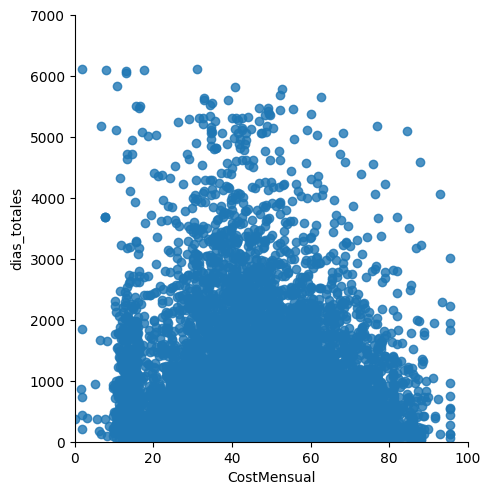

In [103]:
# Diagrama de dispersión MesesModalidadPago y dias_totales:

# basic scatterplot
sns.lmplot( x="CostMensual", y="dias_totales", data=df, fit_reg=False)

# control x and y limits
plt.ylim(0, 7000)
plt.xlim(0, 100)

plt.show()

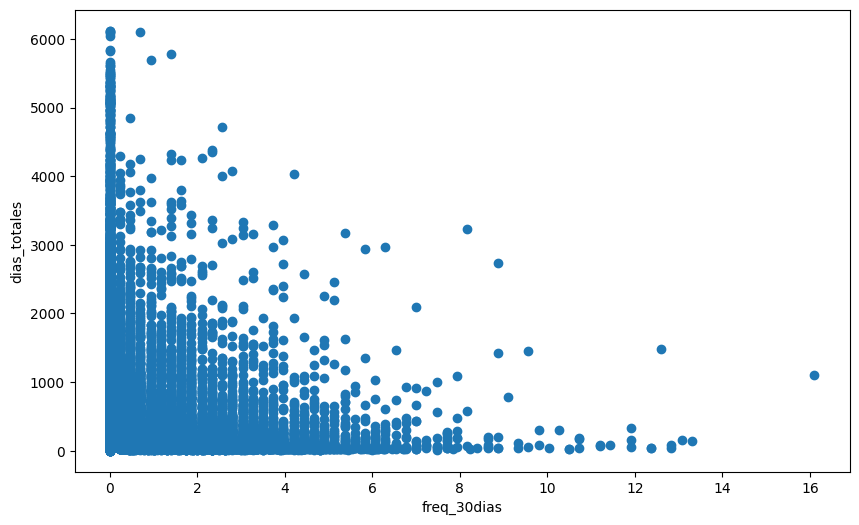

In [104]:
# Diagrama de dispersión frecuencia_reciente y dias_totales:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['freq_30dias'], df['dias_totales'])
ax.set_xlabel('freq_30dias')
ax.set_ylabel('dias_totales')
plt.show()

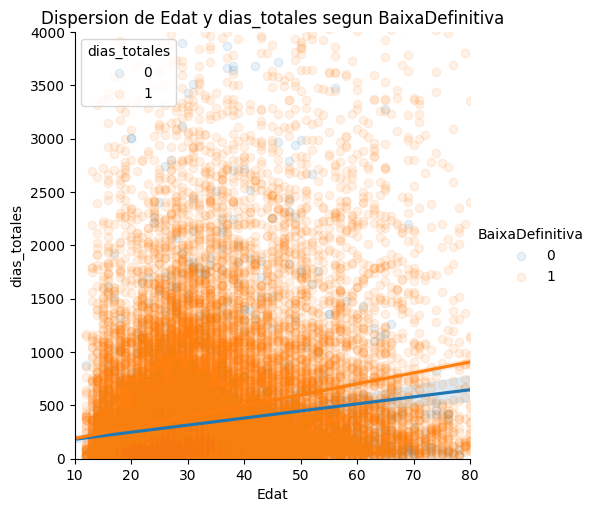

In [105]:
# Grafico de dispersion de 'Edat' y 'dias_totales'
df = df
sns.lmplot( x = "Edat_Alta", y = "dias_totales",
           hue = "BaixaDefinitiva", data = df, scatter_kws={'alpha':0.1})
# Configuraciones adicionales del gráfico
plt.title('Dispersion de Edat y dias_totales segun BaixaDefinitiva')
plt.xlabel('Edat')
plt.legend(title='dias_totales')
plt.xlim(10, 80)
plt.ylim(0, 4000)

plt.show()

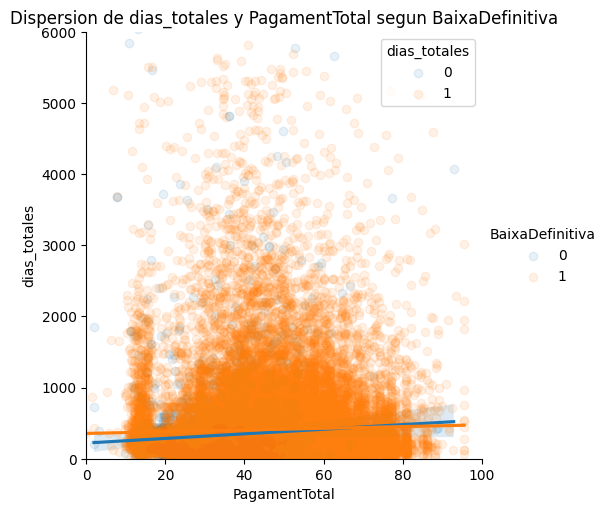

In [106]:
# Grafico de dispersion de 'PagamentTotal' y 'dias_totales'

sns.lmplot( x = "CostMensual", y = "dias_totales",
           hue = "BaixaDefinitiva", data = df, scatter_kws={'alpha':0.1})
# Configuraciones adicionales del gráfico
plt.title('Dispersion de dias_totales y PagamentTotal segun BaixaDefinitiva')
plt.xlabel('PagamentTotal')
plt.legend(title='dias_totales')
plt.xlim(0, 100)
plt.ylim(0, 6000)

plt.show()

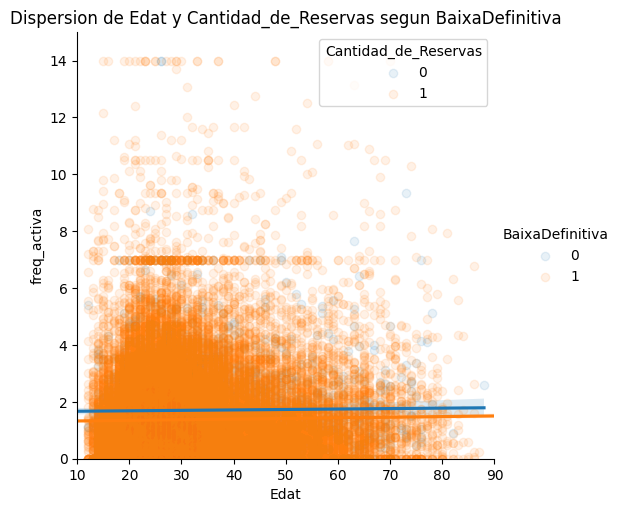

In [107]:
# Grafico de dispersion de 'PagamentTotal' y 'dias_totales'

sns.lmplot( x = "Edat_Alta", y = "freq_activa",
           hue = "BaixaDefinitiva", data = df, scatter_kws={'alpha':0.1})
# Configuraciones adicionales del gráfico
plt.title('Dispersion de Edat y Cantidad_de_Reservas segun BaixaDefinitiva')
plt.xlabel('Edat')
plt.legend(title='Cantidad_de_Reservas')
plt.xlim(10, 90)
plt.ylim(0, 15)

plt.show()

## Imputacion de Valores Nulos

In [108]:
#CARGAR
data_ruta = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_reducido.xlsx'

data_seleccionado = pd.read_excel(data_ruta)

In [109]:
df=data_seleccionado.copy()

In [110]:
df_dumm = pd.get_dummies(df, columns=['Sexe','Nacionalitat','CategoriaModalitat',
     'dia_habitual','franja_habitual','act_preferida','ServiciosExtra','Mes_de_Alta'], drop_first=True)

In [111]:
# Se ejecutó para elegir el mejor valor para KNN en un proceso similar al metodo del codo

'''
scaler = MinMaxScaler()
dataset_final_dumm_scaled = scaler.fit_transform(dataset_final_dumm)
var_diffs = []

k_values = range(3, 10)  # Puedes ajustar el rango según tus necesidades

# desviación estándar del grupo original excluyendo los valores nulos
var_original_no_missing = np.var(dataset_final_dumm[['Edat', 'PagamentTotal', 'MesesModalidadPago', 'Descuento', 'Cost_diari']].dropna().values)

for k in k_values:
    imputer_knn = KNNImputer(n_neighbors=k)
    data_knn_imputed = imputer_knn.fit_transform(dataset_final_dumm_scaled)
    dataset_final_imputed_knn = pd.DataFrame(data_knn_imputed, columns=dataset_final_dumm.columns)

    dataset_final_dumm_imputado_desestandarizado = scaler.inverse_transform(dataset_final_imputed_knn)

    # SE crea un PD un DataFrame con los datos desestandarizados
    dataset_final_dumm_imputado_desestandarizado_df = pd.DataFrame(dataset_final_dumm_imputado_desestandarizado, columns=dataset_final_dumm.columns)

    # Calcular la desviación estándar del grupo resultante total con los valores imputados
    var_imputed_total = np.var(dataset_final_dumm_imputado_desestandarizado_df[['Edat', 'PagamentTotal', 'MesesModalidadPago', 'Descuento', 'Cost_diari']].values)

    # Calcular la diferencia de desviaciones estándar
    var_diff = var_original_no_missing - var_imputed_total
    var_diffs.append(var_diff)

plt.plot(list(k_values), var_diffs, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Diferencia de Varianzas')
plt.title('Diferencia de varianzas para KNNImputer')
plt.show()

'''


"\nscaler = MinMaxScaler()\ndataset_final_dumm_scaled = scaler.fit_transform(dataset_final_dumm)\nvar_diffs = []\n\nk_values = range(3, 10)  # Puedes ajustar el rango según tus necesidades\n\n# desviación estándar del grupo original excluyendo los valores nulos\nvar_original_no_missing = np.var(dataset_final_dumm[['Edat', 'PagamentTotal', 'MesesModalidadPago', 'Descuento', 'Cost_diari']].dropna().values)\n\nfor k in k_values:\n    imputer_knn = KNNImputer(n_neighbors=k)\n    data_knn_imputed = imputer_knn.fit_transform(dataset_final_dumm_scaled)\n    dataset_final_imputed_knn = pd.DataFrame(data_knn_imputed, columns=dataset_final_dumm.columns)\n\n    dataset_final_dumm_imputado_desestandarizado = scaler.inverse_transform(dataset_final_imputed_knn)\n\n    # SE crea un PD un DataFrame con los datos desestandarizados\n    dataset_final_dumm_imputado_desestandarizado_df = pd.DataFrame(dataset_final_dumm_imputado_desestandarizado, columns=dataset_final_dumm.columns)\n\n    # Calcular la des

In [112]:
#IMPUTAMOS NULOS CON KNN SIN NORMALIZAR
imputer_knn = KNNImputer(n_neighbors=5)

df_knn_imputed_nost = imputer_knn.fit_transform(df_dumm)
df_nostd_imputed_knn = pd.DataFrame(df_knn_imputed_nost, columns=df_dumm.columns)


In [113]:
#IMPUTAMOS NULOS CON KNN NORMALIZANDO
scaler = MinMaxScaler()
df_dumm_scaled = scaler.fit_transform(df_dumm)

imputer_knn = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos

np_knn_imputed = imputer_knn.fit_transform(df_dumm_scaled)
df_knn_imputed = pd.DataFrame(np_knn_imputed, columns=df_dumm.columns)

# Desestandarizar los datos imputados
np_knn_imputed_disstd = scaler.inverse_transform(df_knn_imputed)
df_knn_imputed_disstd = pd.DataFrame(np_knn_imputed_disstd, columns=df_dumm.columns)

In [114]:
#MEJORA; SE INCORPORAN SOLO LAS COLUMNAS CON DATOS IMPUTADOS
# copia los datos originales
df_knn_result_mix = df_dumm.copy()

# Reemplazar únicamente las columnas con nulos por las correspondientes del resultado desestandarizado
columnas_con_nulos = df_knn_result_mix.columns[df_knn_result_mix.isnull().any()].tolist()
df_aux_knn_integrado = pd.DataFrame(np_knn_imputed_disstd, columns=df_knn_result_mix.columns)

df_aux_knn_integrado.index = df_knn_result_mix.index

df_knn_result_mix.loc[:, columnas_con_nulos] = df_aux_knn_integrado.loc[:, columnas_con_nulos].values

In [115]:
#IMPUTAMOS NULOS CON MICE
mice_imputer = mice.MICEData(df_dumm)

# Realizar la imputación MICE
df_mice_imputed = mice_imputer.data

In [116]:
columnas_con_nulos = df_dumm.columns[df_dumm.isnull().any()].tolist()

for columna_objetivo in columnas_con_nulos:
    filas_sin_nulos_antes = ~df_dumm[columna_objetivo].isnull()

    # estadisticas antes de la imputación
    estadisticas_antes = df_dumm.loc[filas_sin_nulos_antes, columna_objetivo].describe()

    # estadisticas antes después de la imputación
    estadisticas_knn_nostd = df_nostd_imputed_knn[columna_objetivo].describe()
    estadisticas_knn = df_knn_imputed_disstd[columna_objetivo].describe()
    estadisticas_knnmix = df_knn_result_mix[columna_objetivo].describe()
    estadisticas_mice = df_mice_imputed[columna_objetivo].describe()

    comparativa=pd.DataFrame()
    comparativa['antes']=estadisticas_antes
    comparativa['knn_nost']=estadisticas_knn_nostd
    comparativa['knn_st']=estadisticas_knn
    comparativa['knn_mix']=estadisticas_knnmix
    comparativa['mice']=estadisticas_mice


    print(f'La comparativa de estadisticas de {columna_objetivo}:')
    print(comparativa)

La comparativa de estadisticas de CostMensual:
             antes     knn_nost       knn_st      knn_mix         mice
count  9451.000000  9456.000000  9456.000000  9456.000000  9456.000000
mean     35.008908    35.003811    35.008125    35.008125    35.008908
std      10.006057    10.007174    10.004243    10.004243    10.003411
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%      28.855800    28.852317    28.858950    28.858950    28.858950
50%      35.250000    35.240000    35.245000    35.245000    35.240000
75%      41.370000    41.362500    41.362500    41.362500    41.362500
max      92.870000    92.870000    92.870000    92.870000    92.870000


In [117]:
data_imputado=df_knn_result_mix.copy()

In [118]:
#GRABAR
data_imputado_ruta = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_imputado.xlsx'

data_imputado.to_excel(data_imputado_ruta, index=False)

In [119]:
# correlacion entre antes y despues de imputar. 1 es el valor perfecto
correlation_matrix = df_dumm.corrwith(data_imputado)
print(correlation_matrix)

CentreOrigen                       1.0
BaixaDefinitiva                    1.0
numero_accesos                     1.0
numero_reservas                    1.0
antelacion_promedio                1.0
Attended                           1.0
Cancelled                          1.0
NotAttended                        1.0
Fitness                            1.0
PersTraining                       1.0
GroupExercise                      1.0
Nutrition                          1.0
Descuento                          1.0
DiasModalitatPago                  1.0
dias_totales                       1.0
period_primer_acces                1.0
period_solic_baixa                 1.0
percent_consumit                   1.0
dias_sin_venir                     1.0
ratio_inactivo                     1.0
ratio_primer_us                    1.0
num_inscripcions                   1.0
Edat_Alta                          1.0
Distancia                          1.0
freq_activa                        1.0
freq_30dias              

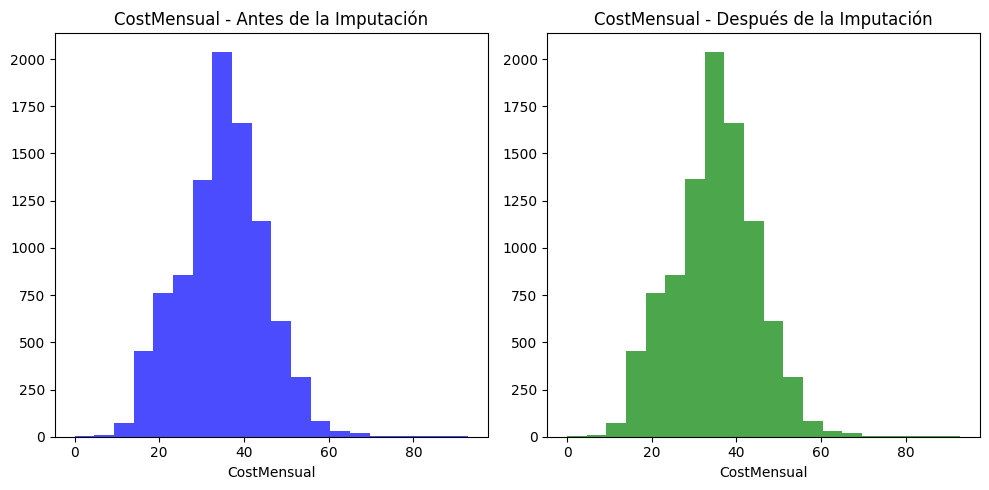

In [120]:
#  comparativas de distribucion antes y despues de imputar
for columna_objetivo in columnas_con_nulos:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Histograma de antes
    axs[0].hist(df_dumm[columna_objetivo].dropna(), bins=20, color='blue', alpha=0.7)
    axs[0].set_title(f'{columna_objetivo} - Antes de la Imputación')
    axs[0].set_xlabel(columna_objetivo)

    # Histograma de despues
    axs[1].hist(data_imputado[columna_objetivo], bins=20, color='green', alpha=0.7)
    axs[1].set_title(f'{columna_objetivo} - Después de la Imputación')
    axs[1].set_xlabel(columna_objetivo)

    plt.tight_layout()
    plt.show()

## Outliers y balanceo de clases

In [121]:
#CARGAR
data_imputado_ruta = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_imputado.xlsx'

data_imputado = pd.read_excel(data_imputado_ruta)

In [122]:
df=data_imputado.copy()

In [123]:
# Porcentaje de valores 1 y 0 en la variable BaixaDefinitiva
porcentaje_valores = df['BaixaDefinitiva'].value_counts(normalize=True) * 100

print("Porcentaje de valores en BaixaDefinitiva:")
print(porcentaje_valores)

Porcentaje de valores en BaixaDefinitiva:
1    74.735618
0    25.264382
Name: BaixaDefinitiva, dtype: float64


In [124]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64','uint8']).columns
datos_numericos = df[columnas_numericas].to_numpy()

In [125]:
# OUTLIERS MinCovDet

# Calcular la matriz de covarianza robusta usando el estimador MCD
robust_cov = MinCovDet().fit(datos_numericos)

# Calcular las distancias de Mahalanobis para cada observación
mahalanobis_distances = robust_cov.mahalanobis(datos_numericos)

# Definir un umbral para identificar outliers
umbral_outliers = 5.0

# Identificar las filas con distancias de Mahalanobis que superan el umbral
outliers_indices = np.where(mahalanobis_distances > umbral_outliers)[0]

# Obtener las filas que son outliers
outliers_MCD = df.iloc[outliers_indices]

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [126]:
print(outliers_MCD.shape)

(9456, 77)


In [127]:
# OUTLIERS Isolation Forest
modelo_isolation_forest = IsolationForest(contamination=0.01)

# Ajustar el modelo y predecir outliers
df['is_outlier'] = modelo_isolation_forest.fit_predict(datos_numericos)

# Filtrar los registros identificados como outliers
outliers_IF = df[df['is_outlier'] == -1]

In [128]:
print(outliers_IF.shape)

(95, 78)


In [129]:
# Ignorar outliers
data_no_marcado = data_imputado.copy()

# Mantener outliers marcados
data_con_outliers = df.copy()

# Eliminar outliers
indices_outliers = outliers_IF[outliers_IF['is_outlier'] == -1].index
df = df.drop(indices_outliers)
df = df.drop('is_outlier', axis=1)

data_sin_outliers=df.copy()

In [130]:
#GRABAR
data_sin_out_ruta = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_sin_outliers.xlsx'

data_sin_outliers.to_excel(data_sin_out_ruta, index=False)

# FASE 2 Entrenamiento delo modelo

In [131]:
#CARGAR
data_sin_out_ruta = '/content/drive/MyDrive/TFG/DATASHEETS/PROCESSED/data_sin_outliers.xlsx'

data_sin_outliers = pd.read_excel(data_sin_out_ruta)

In [132]:
df=data_sin_outliers.copy()

In [133]:
from sksurv.util import Surv
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.svm import FastKernelSurvivalSVM, FastSurvivalSVM, HingeLossSurvivalSVM,HingeLossSurvivalSVM
from sksurv.functions import StepFunction
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.model_selection import KFold
from sksurv.metrics import cumulative_dynamic_auc
from sksurv.metrics import integrated_brier_score
set_config(display="text")

## Seleccion del modelo

In [134]:
model1 = CoxPHSurvivalAnalysis(alpha=0.5)
model2 = CoxnetSurvivalAnalysis(fit_baseline_model=True)
model3 = RandomSurvivalForest(n_estimators=100, max_depth=5)
model4 = FastKernelSurvivalSVM()
model5 = FastSurvivalSVM()
model6 = GradientBoostingSurvivalAnalysis()

modelos=[model1, model2, model3, model4, model5, model6]

# Seleccionar las variables predictoras que se desean incluir en el modelo
predictors = [col for col in df.columns if col not in ['BaixaDefinitiva', 'dias_totales','period_solic_baixa']]

# Definir las características (X) y las etiquetas (y)
X = df[predictors]
y = df[['BaixaDefinitiva', 'dias_totales']]

In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components='mle')  # 'mle' puede ser usado para estimar el número de componentes
X_pca = pca.fit_transform(X_scaled)

In [137]:
'''Se intentan buscar HIPERPARAMETROS para FastKernelSurvivalSVM
pero no converge. Muy lento.

from sklearn.model_selection import GridSearchCV
from sksurv.svm import FastKernelSurvivalSVM
from sksurv.svm import FastSurvivalSVM

y_np = Surv.from_dataframe('BaixaDefinitiva', 'dias_totales', y)

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'alpha': [0.1, 1, 10],  # Parámetro de regularización, similar a C en otros SVM
    'kernel': ['rbf'],      # Otras opciones podrían ser 'linear', 'poly'
    'gamma': [0.01, 0.1, 1] # Solo es relevante para algunos tipos de kernel como 'rbf'
}

# FastKernelSurvivalSVM
model4 = FastKernelSurvivalSVM(optimizer='rbtree', kernel='rbf')
grid_search = GridSearchCV(model4, param_grid, cv=5)
grid_search.fit(X_pca, y_np)

print("Mejores hiperparámetros para FastKernelSurvivalSVM:", grid_search.best_params_)'''

'Se intentan buscar HIPERPARAMETROS para FastKernelSurvivalSVM \npero no converge. Muy lento.\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sksurv.svm import FastKernelSurvivalSVM\nfrom sksurv.svm import FastSurvivalSVM\n\ny_np = Surv.from_dataframe(\'BaixaDefinitiva\', \'dias_totales\', y)\n\n# Definir los hiperparámetros para la búsqueda en cuadrícula\nparam_grid = {\n    \'alpha\': [0.1, 1, 10],  # Parámetro de regularización, similar a C en otros SVM\n    \'kernel\': [\'rbf\'],      # Otras opciones podrían ser \'linear\', \'poly\'\n    \'gamma\': [0.01, 0.1, 1] # Solo es relevante para algunos tipos de kernel como \'rbf\'\n}\n\n# FastKernelSurvivalSVM\nmodel4 = FastKernelSurvivalSVM(optimizer=\'rbtree\', kernel=\'rbf\')\ngrid_search = GridSearchCV(model4, param_grid, cv=5)\ngrid_search.fit(X_pca, y_np)\n\nprint("Mejores hiperparámetros para FastKernelSurvivalSVM:", grid_search.best_params_)'

In [138]:
# Entrenamiento rapido con conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lo smétodos esperan un array compuesta por evento y tiempo como respuesta
y_train_np = Surv.from_dataframe('BaixaDefinitiva', 'dias_totales', y_train)
y_test_np = Surv.from_dataframe('BaixaDefinitiva', 'dias_totales', y_test)

for model in modelos:
    model.fit(X_train, y_train_np)

<ipython-input-138-87d19ea5285b>:9: ConvergenceWarning: Optimization did not converge: Warning: Maximum number of iterations has been exceeded.
  model.fit(X_train, y_train_np)


## Evaluacion del modelo

In [139]:
for model in modelos:
    cindex = model.score(X_test, y_test_np)
    print(f"El c-index del algoritmo '{type(model).__name__}' es: {cindex}")

El c-index del algoritmo 'CoxPHSurvivalAnalysis' es: 0.8700767879227187
El c-index del algoritmo 'CoxnetSurvivalAnalysis' es: 0.8757855797652332
El c-index del algoritmo 'RandomSurvivalForest' es: 0.8751920539948493
El c-index del algoritmo 'FastKernelSurvivalSVM' es: 0.7611719650417531
El c-index del algoritmo 'FastSurvivalSVM' es: 0.914216583867717
El c-index del algoritmo 'GradientBoostingSurvivalAnalysis' es: 0.953617013395161


In [140]:
'''# Dividir los datos en folds para Cross Validation.
Se obtiene las medidas as precisas del C-INDEX pero los resultados osn muy similares. MUY LENTO

kf = KFold(n_splits=5, shuffle=True)

for model in modelos:
    cv_results = []
    for train_index, test_index in kf.split(df):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_train_np = Surv.from_dataframe('BaixaDefinitiva', 'dias_totales', y_train)
        y_test_np = Surv.from_dataframe('BaixaDefinitiva', 'dias_totales', y_test)

        # Entreno del modelo
        model.fit(X_train, y_train_np)

        # Evaluación del modelo
        cv_results.append(model.score(X_test, y_test_np))

    # error medio
    c_index_avg=np.mean(cv_results)
    print(f"El c-index del algoritmo '{type(model).__name__}' es: {c_index_avg}")'''

'# Dividir los datos en folds para Cross Validation\nkf = KFold(n_splits=5, shuffle=True)\n\nfor model in modelos:\n    cv_results = []\n    for train_index, test_index in kf.split(df):\n        X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n        y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n\n        y_train_np = Surv.from_dataframe(\'BaixaDefinitiva\', \'dias_totales\', y_train)\n        y_test_np = Surv.from_dataframe(\'BaixaDefinitiva\', \'dias_totales\', y_test)\n\n        # Entreno del modelo\n        model.fit(X_train, y_train_np)\n\n        # Evaluación del modelo\n        cv_results.append(model.score(X_test, y_test_np))\n\n    # error medio\n    c_index_avg=np.mean(cv_results)\n    print(f"El c-index del algoritmo \'{type(model).__name__}\' es: {c_index_avg}")'

In [142]:
#ALMACENAJE DE LOS MODELOS
import joblib
from google.colab import drive

# Guardar el modelo
joblib.dump(model1, '/content/drive/MyDrive/TFG/Models/model1.joblib')
joblib.dump(model2, '/content/drive/MyDrive/TFG/Models/model2.joblib')
joblib.dump(model3, '/content/drive/MyDrive/TFG/Models/model3.joblib')
joblib.dump(model4, '/content/drive/MyDrive/TFG/Models/model4.joblib')
joblib.dump(model5, '/content/drive/MyDrive/TFG/Models/model5.joblib')
joblib.dump(model6, '/content/drive/MyDrive/TFG/Models/model6.joblib')

# Cargar los modelos
from joblib import load

model1 = load('/content/drive/MyDrive/TFG/Models/model1.joblib')
model2 = load('/content/drive/MyDrive/TFG/Models/model2.joblib')
model3 = load('/content/drive/MyDrive/TFG/Models/model3.joblib')
model4 = load('/content/drive/MyDrive/TFG/Models/model4.joblib')
model5 = load('/content/drive/MyDrive/TFG/Models/model5.joblib')
model6 = load('/content/drive/MyDrive/TFG/Models/model6.joblib')


In [143]:

# Asume que tienes X_test, y_test y que los modelos ya están entrenados
# Calcula el Brier Score integrado para cada modelo
for model in [model1 , model2, model3,  model6]:
    pred_surv = model.predict_survival_function(X_test, return_array=True)
    # Ajustar el rango de tiempos para que esté dentro del rango de seguimiento de tus datos
    min_time = y_test_np['dias_totales'].min()
    max_time = y_test_np['dias_totales'].max()-1
    # Asegurándote de que el rango de tiempos esté dentro de los límites de tus datos
    times = np.linspace(min_time, max_time, num=pred_surv.shape[1])
    ibs = integrated_brier_score(y_test_np, y_test_np, pred_surv, times)
    print(f"Integrated Brier Score for {type(model).__name__}: {ibs}")


Integrated Brier Score for CoxPHSurvivalAnalysis: 0.1470849370626381
Integrated Brier Score for CoxnetSurvivalAnalysis: 0.13394213636767419
Integrated Brier Score for RandomSurvivalForest: 0.11572334104830358
Integrated Brier Score for GradientBoostingSurvivalAnalysis: 0.11970737881925135


El AUC del algoritmo 'CoxPHSurvivalAnalysis' es: 0.9666592462211379
El AUC del algoritmo 'CoxnetSurvivalAnalysis' es: 0.9694503422848574
El AUC del algoritmo 'RandomSurvivalForest' es: 0.9590672603801307
El AUC del algoritmo 'FastSurvivalSVM' es: 0.9817008011719481
El AUC del algoritmo 'GradientBoostingSurvivalAnalysis' es: 0.9943875937796828


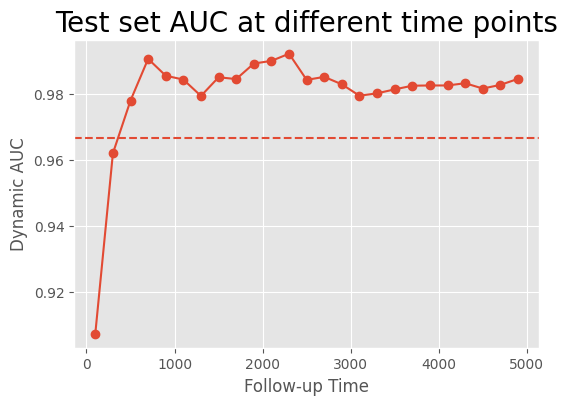

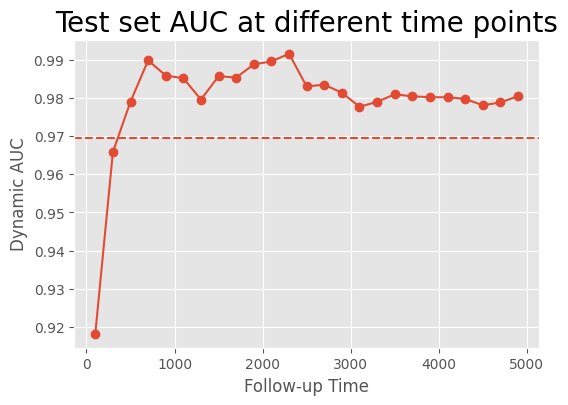

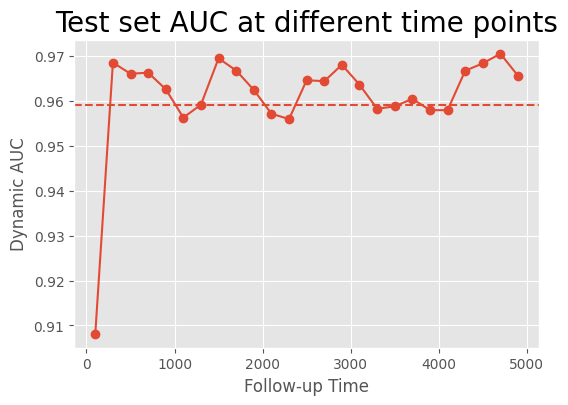

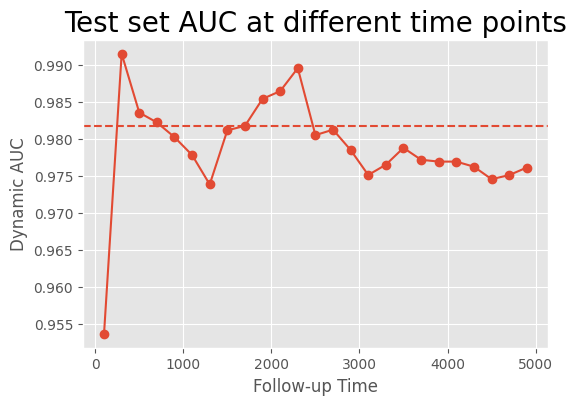

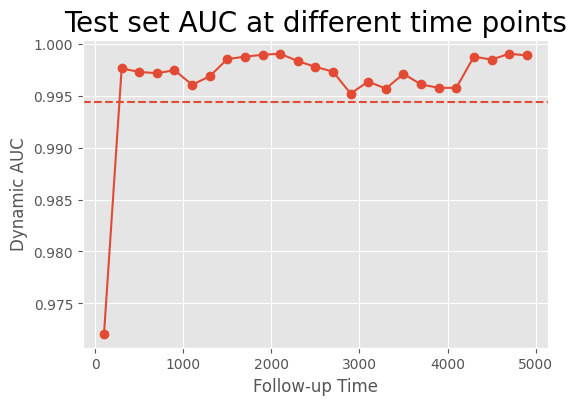

In [146]:
from sksurv.metrics import cumulative_dynamic_auc
plt.style.use('ggplot')
# Times <t> at which to calculate the AUC

modelos=[model1, model2, model3, model5, model6]

for model in modelos:
    # Ajustar va_times para concentrarse en un rango con más eventos y menos censura
    va_times = np.arange(100, 5000, 200)
    cph_risk_scores = model.predict(X_test)
    cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train_np, y_test_np, cph_risk_scores, va_times)

    plt.figure(figsize = (6,4))
    plt.plot(va_times, cph_auc, marker = 'o')
    plt.axhline(cph_mean_auc, linestyle = '--')
    plt.title('Test set AUC at different time points', fontsize = 20)
    plt.xlabel('Follow-up Time')
    plt.ylabel('Dynamic AUC')

    print(f"El AUC del algoritmo '{type(model).__name__}' es: {cph_mean_auc}")

## Resultados

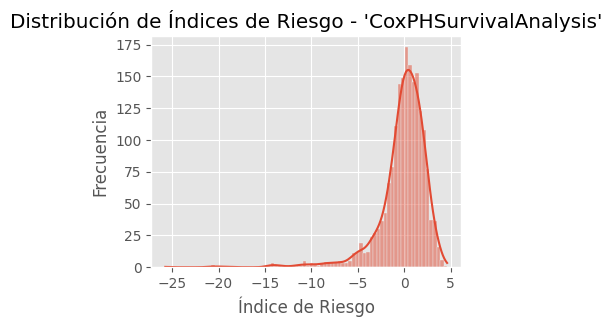

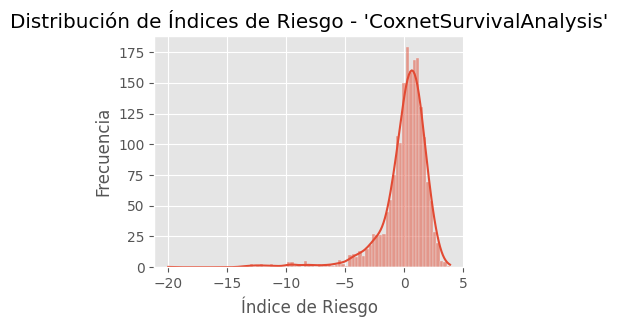

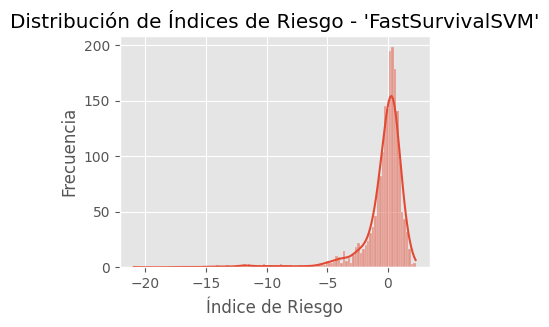

In [149]:
modelos=[model1, model2, model5]

for model in modelos:
    plt.figure(figsize=(4, 3))
    risk_scores = model.predict(X_test)
    sns.histplot(risk_scores, kde=True)
    plt.title(f"Distribución de Índices de Riesgo - '{type(model).__name__}'")
    plt.xlabel("Índice de Riesgo")
    plt.ylabel("Frecuencia")
    plt.show()


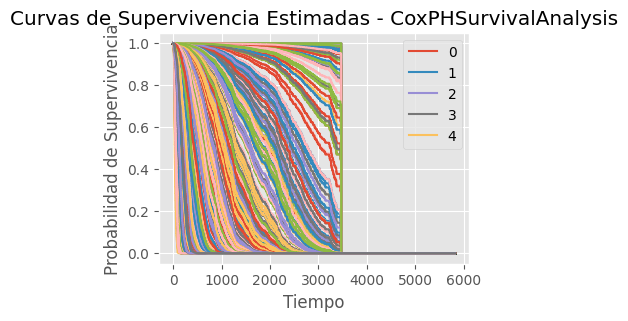

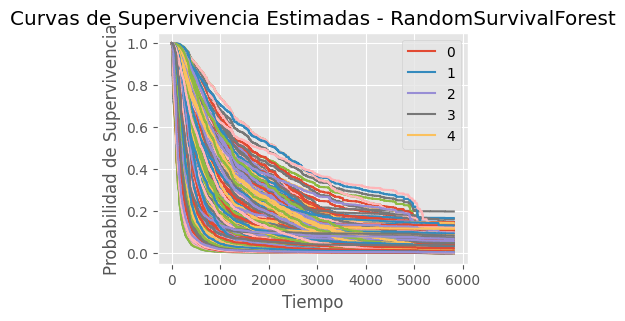

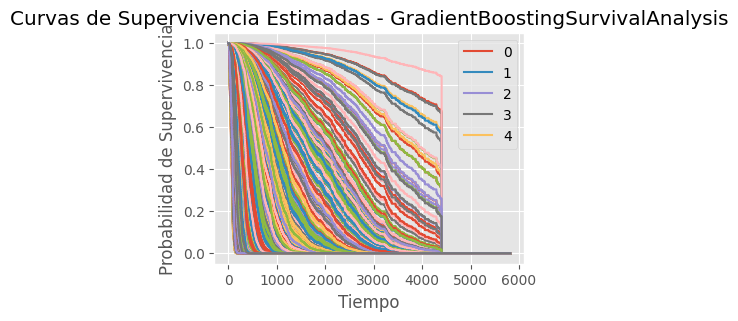

In [150]:
modelos=[model1, model3, model6]

for model in modelos:
    plt.figure(figsize=(4, 3))
    surv_funcs_rf = model.predict_survival_function(X_test)
    for i, surv_func in enumerate(surv_funcs_rf):
        plt.step(surv_func.x, surv_func.y, where="post", label=str(i) if i < 5 else None)

    plt.title(f"Curvas de Supervivencia Estimadas - {type(model).__name__}")
    plt.xlabel("Tiempo")
    plt.ylabel("Probabilidad de Supervivencia")
    plt.legend()
    plt.show()

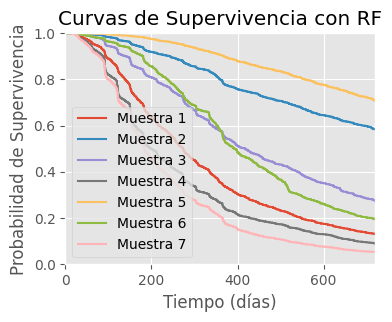

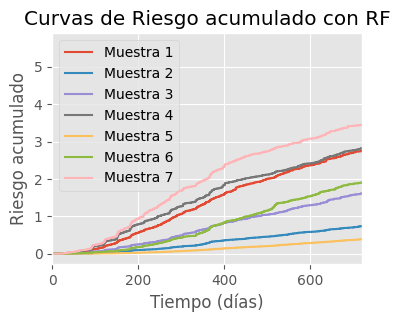

In [151]:
models = [model3]

for model in models:
  plt.figure(figsize=(4, 3))
  # Obtener las curvas de supervivencia
  survival_functions = model3.predict_survival_function(X_test)
  hazard_functions = model3.predict_cumulative_hazard_function(X_test)

  # Graficar las curvas de supervivencia
  for i in range(7):
    time_points = survival_functions[i].x
    survival_probs = survival_functions[i](time_points)
    plt.step(time_points, survival_probs, label=f'Muestra {i + 1}')

  plt.legend()
  plt.title('Curvas de Supervivencia con RF')
  plt.xlabel('Tiempo (días)')
  plt.ylabel('Probabilidad de Supervivencia')
  plt.xlim(0, 720)
  plt.ylim(0, 1)

  plt.show()

  plt.figure(figsize=(4, 3))
  # Obtener las curvas de riesgo
  hazard_functions = model3.predict_cumulative_hazard_function(X_test)

  # Graficar las curvas de riesgo
  for i in range(7):
    time_points = hazard_functions[i].x
    hazard_probs = hazard_functions[i](time_points)
    plt.step(time_points, hazard_probs, label=f'Muestra {i + 1}')

  plt.legend()
  plt.title('Curvas de Riesgo acumulado con RF')
  plt.xlabel('Tiempo (días)')
  plt.ylabel('Riesgo acumulado')
  plt.xlim(0, 720)

  plt.show()

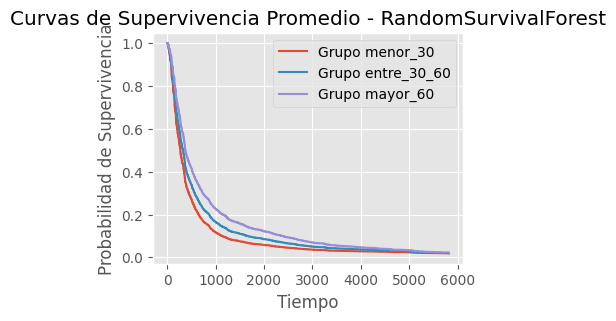

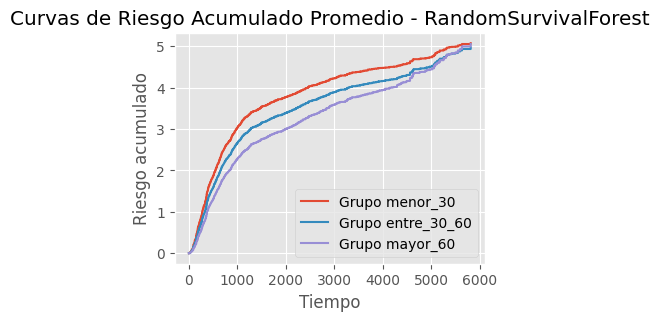

In [152]:
# CURVAS DE SUPERVIVENCIA Y RIESGO POR UNA VARIABLE
grupos_edad = {
    'menor_30': X_test['Edat_Alta'] < 30,
    'entre_30_60': (X_test['Edat_Alta'] >= 30) & (X_test['Edat_Alta'] <= 60),
    'mayor_60': X_test['Edat_Alta'] > 60
}

models = [model3]

for model in models:
    plt.figure(figsize=(4, 3))

    for grupo_nombre, grupo_mascara in grupos_edad.items():
        X_grupo = X_test[grupo_mascara]
        y_grupo = y_test[grupo_mascara]

        # Verificar si el grupo está vacío
        if len(X_grupo) == 0:
            continue

        # Obtener las funciones de supervivencia
        surv_funcs = model.predict_survival_function(X_grupo)

        # Calcular la función de supervivencia promedio para el grupo
        curva_promedio = np.mean([func.y for func in surv_funcs], axis=0)

        # Graficar la curva promedio
        plt.step(surv_funcs[0].x, curva_promedio, where="post", label=f'Grupo {grupo_nombre}')

    plt.title(f"Curvas de Supervivencia Promedio - {type(model).__name__}")
    plt.xlabel("Tiempo")
    plt.ylabel("Probabilidad de Supervivencia")
    plt.legend()
    plt.show()

    plt.figure(figsize=(4, 3))
    for grupo_nombre, grupo_mascara in grupos_edad.items():
        X_grupo = X_test[grupo_mascara]
        y_grupo = y_test[grupo_mascara]

        # Verificar si el grupo está vacío
        if len(X_grupo) == 0:
            continue

        # Obtener las funciones de supervivencia
        hzd_funcs = model.predict_cumulative_hazard_function(X_grupo)

        # Calcular la función de supervivencia promedio para el grupo
        curva_promedio = np.mean([func.y for func in hzd_funcs], axis=0)

        # Graficar la curva promedio
        plt.step(hzd_funcs[0].x, curva_promedio, where="post", label=f'Grupo {grupo_nombre}')

    plt.title(f"Curvas de Riesgo Acumulado Promedio - {type(model).__name__}")
    plt.xlabel("Tiempo")
    plt.ylabel("Riesgo acumulado")
    plt.legend()
    plt.show()


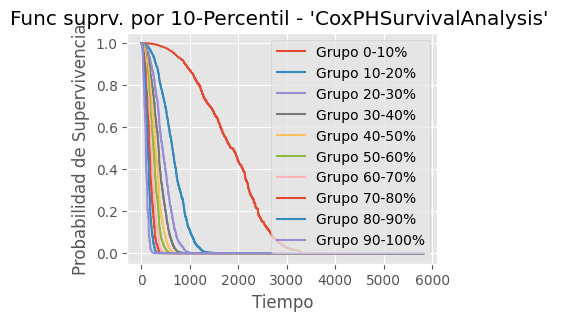

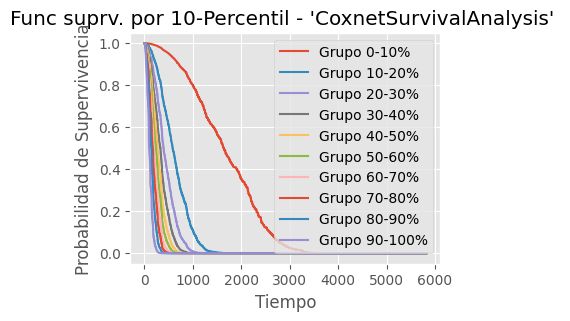

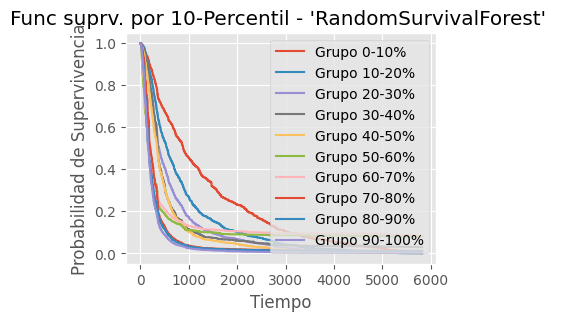

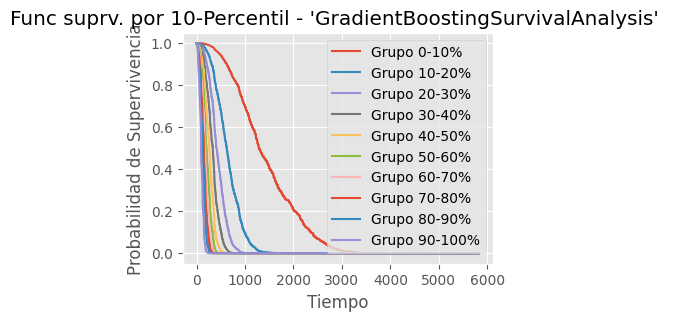

In [153]:
# AGRUPADAS POR PERCENTILES

models_funcion_surv=[model1, model2, model3, model6]

for model in models_funcion_surv:
    predicciones = model.predict(X_test)
    df_predicciones = pd.DataFrame(predicciones, columns=['probabilidad_supervivencia'])

    percentiles = np.percentile(df_predicciones['probabilidad_supervivencia'], np.linspace(0, 100, 11))
    etiquetas_percentiles = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

    df_predicciones['grupo_percentil'] = pd.cut(df_predicciones['probabilidad_supervivencia'], percentiles, include_lowest=True, labels=etiquetas_percentiles)

    # Utilizar predict_survival_function para obtener las funciones de supervivencia
    surv_funcs = model.predict_survival_function(X_test)

    representantes = df_predicciones.groupby('grupo_percentil')['probabilidad_supervivencia'].median()
    # índice de la observación más cercana a la mediana en cada grupo
    indices_representativos = df_predicciones.groupby('grupo_percentil').apply(lambda x: (x['probabilidad_supervivencia'] - representantes[x.name]).abs().idxmin())
    plt.figure(figsize=(4, 3))

    # Graficar la función de supervivencia de cada representante
    for indice in indices_representativos:

        surv_func = surv_funcs[indice]
        plt.step(surv_func.x, surv_func.y, where="post", label=f'Grupo {df_predicciones.loc[indice, "grupo_percentil"]}')

    plt.title(f"Func suprv. por 10-Percentil - '{type(model).__name__}' ")
    plt.xlabel("Tiempo")
    plt.ylabel("Probabilidad de Supervivencia")
    plt.legend()
    plt.show()

In [155]:
# Utilizando Kaplan Meier

# Crear categorías de edad
categorias_edad = {
    'menor_30': X_test['Edat_Alta'] < 30,
    'entre_30_60': (X_test['Edat_Alta'] >= 30) & (X_test['Edat_Alta'] <= 60),
    'mayor_60': X_test['Edat_Alta'] > 60
}

# Calcular y graficar las curvas de supervivencia para cada categoría
plt.figure(figsize=(4, 3))

for nombre, mascara in categorias_edad.items():
    # Filtrar datos por grupo de edad
    X_grupo = X_test[mascara]
    y_grupo = y_test[mascara]

    # Calcular predicciones de riesgo para el grupo
    riesgo_predicho = model4.predict(X_grupo)

    # Calcular las curvas de supervivencia utilizando Kaplan-Meier
    tiempo, prob_surv = kaplan_meier_estimator(y_grupo['BaixaDefinitiva'].astype('bool'), y_grupo['dias_totales'])

    # Graficar la curva de supervivencia
    plt.step(tiempo, prob_surv, where="post", label=f'Grupo {nombre}')

# Configuración del gráfico
plt.title("Curvas de Supervivencia por Grupo de Edad")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de Supervivencia")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but FastKernelSurvivalSVM was fitted without feature names
  warnings.warn(


AttributeError: 'FastKernelSurvivalSVM' object has no attribute 'fit_X_'

<Figure size 400x300 with 0 Axes>

In [156]:
survival_functions = model6.predict_survival_function(X_test)
cum_hazard_functions = model6.predict_cumulative_hazard_function(X_test)

# Encuentra el índice donde el tiempo es igual o más cercano a 61
indice_tiempo = np.where(survival_functions[0].x >= 61)[0][0]

# valores de supervivencia y riesgo en el día 61
survival_initials = [fn.y[indice_tiempo] for fn in survival_functions]
hazard_initials = [fn.y[indice_tiempo] for fn in cum_hazard_functions]

survival_initials_pd = pd.DataFrame({"survival_initial": survival_initials})
hazard_initials_pd = pd.DataFrame({"hazard_initial": hazard_initials})

X_test_with_initials = pd.concat([X_test, survival_initials_pd, hazard_initials_pd], axis=1)

# Ordenado por supervivencia y riesgo
X_test_ord_by_surv = X_test_with_initials.sort_values(by="survival_initial", ascending=True)
X_test_ord_by_hazd = X_test_with_initials.sort_values(by="hazard_initial", ascending=False)

print(X_test_ord_by_surv[['survival_initial','hazard_initial']].head(10))
print(X_test_ord_by_hazd[['survival_initial','hazard_initial']].head(10))

      survival_initial  hazard_initial
987           0.505734        0.017684
1173          0.512495        0.017684
1761          0.520596        0.017684
1640          0.539454        0.017684
1748          0.541805        0.017684
630           0.547818        0.017684
1021          0.548415        0.017684
1337          0.548415        0.017684
102           0.548415        0.017684
946           0.562591        0.017684
      survival_initial  hazard_initial
1718          0.926394        0.017684
1086          0.849836        0.017684
1101          0.996152        0.017684
1100          0.992022        0.017684
1099          0.886602        0.017684
1098          0.994775        0.017684
1097          0.986656        0.017684
1096          0.820732        0.017684
1094          0.985650        0.017684
1093          0.987875        0.017684


## Análisis de características

In [157]:
coeficientes = model1.coef_.ravel()

# Calcular riesgo relativo
riesgo_relativo = np.exp(coeficientes)

# Crear DataFrame
df_coef = pd.DataFrame({
        'Factor de riesgo': X_test.columns,
        'Coefficiente [β]': coeficientes,
        'Riesgo relativo [exp(β)]': riesgo_relativo
    })

# Ordenar el DataFrame por 'Riesgo relativo [exp(β)]' de mayor a menor
df_coef = df_coef.sort_values(by='Riesgo relativo [exp(β)]', ascending=False)

print(df_coef.head(10))
print(df_coef.tail(10))

               Factor de riesgo  Coefficiente [β]  Riesgo relativo [exp(β)]
17              ratio_primer_us          3.821162                 45.657212
16               ratio_inactivo          3.427192                 30.790063
27                   existe_app          0.771639                  2.163309
24                 freq_180dias          0.625137                  1.868502
46       franja_habitual_migdia          0.553621                  1.739540
10                    Nutrition          0.518163                  1.678941
50        franja_habitual_tarda          0.482471                  1.620072
47   franja_habitual_mitjatarda          0.469156                  1.598644
60  act_preferida_VIRTUAL_CLASS          0.450110                  1.568485
59   act_preferida_TONING_CLASS          0.442000                  1.555816
                 Factor de riesgo  Coefficiente [β]  Riesgo relativo [exp(β)]
4                        Attended         -0.127159                  0.880594
55   act

In [158]:
indices=pd.Series(model5.coef_, index=X_test.columns)
indices_ordenados = indices.sort_values(ascending=False)

# Imprimir la Serie ordenada
print(indices_ordenados.head(10))
print(indices_ordenados.tail(10))

CategoriaModalitat_corporate       0.116816
Attended                           0.086901
dia_habitual_Tuesday               0.057125
franja_habitual_primera_hora       0.047205
ServiciosExtra_1                   0.046333
Nacionalitat_1                     0.044949
Mes_de_Alta_5                      0.042991
freq_30dias                        0.040056
act_preferida_SWIMMING_TRAINING    0.037419
dia_habitual_Saturday              0.037090
dtype: float64
CategoriaModalitat_morning   -0.034915
Nacionalitat_2               -0.042693
freq_90dias                  -0.044350
NotAttended                  -0.059092
freq_activa                  -0.071787
dia_habitual_No_acceso       -0.171701
existe_app                   -0.195004
freq_180dias                 -0.282914
ratio_primer_us              -0.359124
ratio_inactivo               -1.122171
dtype: float64


In [159]:
importances = model6.feature_importances_

# Emparejar cada importancia con el nombre de su característica correspondiente
feature_names = X_test.columns
feature_importances = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})

# Ordenar el DataFrame de mayor a menor importancia
feature_importances = feature_importances.sort_values(by='Importancia', ascending=False)

# Mostrar el DataFrame
print(feature_importances.head(10))


         Característica  Importancia
1        numero_accesos     0.418191
15       dias_sin_venir     0.203473
21          freq_activa     0.143892
16       ratio_inactivo     0.072282
17      ratio_primer_us     0.055288
13  period_primer_acces     0.027098
14     percent_consumit     0.026539
24         freq_180dias     0.024896
12    DiasModalitatPago     0.013203
11            Descuento     0.009268


In [160]:
# para RF hereda permutation importance, porque no tiene feature. importance
''' ES MUY LENTO''
from sklearn.inspection import permutation_importance

X_test_array = X_test.values
result = pd.DataFrame()

result = permutation_importance(model3, X_test, y_test_np, n_repeats=5, random_state=0)

pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)
'''

" ES MUY LENTO''\nfrom sklearn.inspection import permutation_importance\n\nX_test_array = X_test.values\nresult = pd.DataFrame()\n\nresult = permutation_importance(model3, X_test, y_test_np, n_repeats=5, random_state=0)"

# Bibliografia

https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3

http://exponentis.es/ejemplo-de-uso-de-dbscan-en-python-para-deteccion-de-outliers

https://carlosfernandovg.github.io/supervivencia_y_series_FC2021-1/funciones-para-el-an%C3%A1lisis-de-supervivencia.html

https://es.linkedin.com/pulse/an%C3%A1lisis-exploratorio-de-datos-con-python-almudena-bonaplata

https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/

https://colab.research.google.com/github/alonsosilvaallende/Random-Survival-Forest-GBCSG2/blob/master/Cox_PH_and_RSF_colab.ipynb#scrollTo=D0xxNWzI-N3j

https://colab.research.google.com/github/sebp/survival-cnn-estimator/blob/master/tutorial_tf2.ipynb#scrollTo=dKl8PQotvERc

https://dehesa.unex.es/bitstream/10662/16726/1/TDUEX_2023_Sobreiro_PN.pdf

https://www.kaggle.com/discussions/questions-and-answers/353100

https://www.7puentes.com/blog/2019/07/17/como-predecir-que-usuarios-o-clientes-se-van-a-dar-de-baja-en-tu-empresa/

http://eio.usc.es/pub/mte/descargas/ProyectosFinMaster/Proyecto_1269.pdf

https://sonery.medium.com/machine-learning-r-prediccion-churn-rate-954a477c6e35

https://www.kaggle.com/code/darango94/churn-de-clientes-project-daniela/notebook

https://learn.microsoft.com/es-es/fabric/data-science/customer-churn

https://repositorio.uchile.cl/bitstream/handle/2250/186972/Desarrollo-de-un-modelo-de-prediccion-de-fuga-de-clientes-y-diseno-de-experimento-para-la.pdf?sequence=1

https://repository.libertadores.edu.co/bitstream/handle/11371/4722/Quevedo_Sang_2022.pdf?sequence=1

https://blogvisionarios.com/articulos-data/analizando-el-abandono-de-clientes-con-python/

https://github.com/zangell44/survival-analysis-lifeline-basics/blob/master/customer_churn.ipynb

https://rpubs.com/arojasmor17/abandono

https://juandelacalle.medium.com/an%C3%A1lisis-de-supervivencia-una-herramienta-oculta-pero-clave-para-el-marketing-e5920bcfdd8f

https://rstudio-pubs-static.s3.amazonaws.com/438542_64aa278b60684f69be38236a5b58711f.html

https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S0003-31702022000400003

https://oa.upm.es/76129/1/TFM_JAIME_MORILLO_LEAL.pdf

https://analisisydecision.es/el-analisis-de-supervivencia-para-segmentar-el-churn/

https://rstudio-pubs-static.s3.amazonaws.com/438542_64aa278b60684f69be38236a5b58711f.html

https://elmundodelosdatos.com/identificacion-valores-perdidos-python/#:~:text=Los%20valores%20perdidos%20(missing%20values,de%20datos%20en%20una%20observaci%C3%B3n.

NUEVOS:
https://todoia.es/guia-completa-de-visualizacion-de-datos-con-python/

https://colab.research.google.com/github/sebp/survival-cnn-estimator/blob/master/tutorial_tf2.ipynb

https://github.com/jaredleekatzman/DeepSurv

https://todoia.es/guia-completa-de-visualizacion-de-datos-con-python/

file:///Users/Andres/Downloads/ijerph-18-10465-v2.pdf

https://www.kaggle.com/code/alessandromarceddu/churn-survival-analysis

https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation

https://www.kaggle.com/code/konradb/ts-7-survival-analysis

https://github.com/liupei101/Tutorial-Machine-Learning-Based-Survival-Analysis/blob/master/Tutorial_Survival_RF.ipynb

